# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### In a nutshell:
Kickstarter is an online funding platform designed as a connection between creativity and capital. Its purpose is to break free from a central focus on profit at all costs.  The "backers" are individuals or groups that pledge money if a project gets fully funded. Success is determined as a project meeting its funding goal within its timeline.


## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Answers below:
1. 281,856 rows and 14 columns
2. All types of variables - integer, decimal, date/time, and categorical
3. missing variables in the following categories: name, usd pledged
4. a project without a name is still a project, so just changed the name to unknown; a project without pledges, though, is neither a success nor a failure and therefore useless to include in dataset (dropped)
5. 281,646 rows after handling missing data
6. I found no odd or inappropriate values in any of the columns, including usd pledged, which has no negative values
7. done

In [2]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

df = pd.read_excel("Kickstarter_Dataset.xlsx")

## this is a large dataset, we want to see all rows 
# pd.set_option('display.max_rows', None)


## this is a very large dataset, be patient, it may take a while to import!!



In [3]:
## determine dataset shape (number of rows and columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [4]:
df["usd_pledged"] = df["usd pledged"]
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,usd pledged,backers,state,usd_pledged
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,3984.000000,46,failed,3984.000000
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,1561.784015,31,failed,1561.784015
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,4152.402045,46,failed,4152.402045
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,19.435528,6,failed,19.435528
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,2908.076574,29,failed,2908.076574


In [5]:
df.drop(columns = "usd pledged", inplace = True)
df.head()

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,backers,state,usd_pledged
0,1009317190,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.0,46,failed,3984.000000
1,1618024139,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,7386.0,31,failed,1561.784015
2,2004838949,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,3834.0,46,failed,4152.402045
3,258770123,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,18.0,6,failed,19.435528
4,690137136,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2598.0,29,failed,2908.076574


In [6]:
## determine which variables have missing data 
df.isnull().sum()


ID                 0
name              35
main_category      0
category           0
country            0
currency           0
launched           0
deadline           0
length_days        0
goal               0
pledged            0
backers            0
state              0
usd_pledged      210
dtype: int64

In [7]:
## handling missing data

## fill all the missing values in "name" with "Unknown Project Name"
df["name"].replace(np.nan, "Unknown Project Name", inplace = True)
#checking to see that it was done correctly
df.loc[df["name"]=="Unknown Project Name"]

## drop all the rows where "usd pledged" is missing
df.dropna(subset=["usd_pledged"], inplace = True)

# checking for missing values
df.isnull().sum()

ID               0
name             0
main_category    0
category         0
country          0
currency         0
launched         0
deadline         0
length_days      0
goal             0
pledged          0
backers          0
state            0
usd_pledged      0
dtype: int64

In [8]:
## inappropriate values in categorical variables; check value counts
df.info()
df["main_category"].value_counts()
df["category"].value_counts()
df["country"].value_counts()
df["currency"].value_counts()
df["state"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281646 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281646 non-null  int64         
 1   name           281646 non-null  object        
 2   main_category  281646 non-null  object        
 3   category       281646 non-null  object        
 4   country        281646 non-null  object        
 5   currency       281646 non-null  object        
 6   launched       281646 non-null  datetime64[ns]
 7   deadline       281646 non-null  datetime64[ns]
 8   length_days    281646 non-null  int64         
 9   goal           281646 non-null  float64       
 10  pledged        281646 non-null  float64       
 11  backers        281646 non-null  int64         
 12  state          281646 non-null  object        
 13  usd_pledged    281646 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

failed        168503
successful    113143
Name: state, dtype: int64

In [9]:
df.loc[df["usd_pledged"]<0].index

Int64Index([], dtype='int64')

In [10]:
df3 = df.copy()

In [11]:
df["launched"].max()

Timestamp('2016-12-01 23:58:45')

In [ ]:
#currency conversions (date range 2009-2016, so will use 2012 exchange rate):
# GBP = 1.5852 USD
# CAD = 1.0005 USD
# EUR = 1.286 USD
# AUD = 1.0357 USD
# SEK = (1/6.503)
# NZD = (1/1.2108)
# DKK = (1/5.6438)
# NOK = (1/5.5584)
# CHF = (1/0.9147)
# SGD = (1/1.2216)
# HKD = (1/7.7507)
# MXN = (1/12.9279)


In [12]:
def convert_to_usd(curr, goal):
    if curr == "GBP":
        return goal*(1.5852)
    
    if curr == "CAD":
        return goal*(1.0005)
    
    if curr == "EUR":
        return goal*(1.286)
    
    if curr == "AUD":
        return goal*(1.0357)
    
    if curr == "SEK":
        return goal*(1/6.503)
    
    if curr == "NZD":
        return goal*(1/1.2108)
    
    if curr =="DKK":
        return goal*(1/5.6438)
    
    if curr =="NOK":
        return goal*(1/5.5584)
    
    if curr == "CHF":
        return goal*(1/0.9147)
    
    if curr =="SGD":
        return goal*(1/1.2216)
    
    if curr =="HKD":
        return goal*(1/7.7507)
    
    if curr =="MXN":
        return goal*(1/12.9279)
    
    if curr == "USD":
        return goal

In [13]:
df3['goal_usd'] = df3.apply(lambda x: convert_to_usd(x.currency, x.goal), axis=1)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281646 entries, 0 to 281855
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281646 non-null  int64         
 1   name           281646 non-null  object        
 2   main_category  281646 non-null  object        
 3   category       281646 non-null  object        
 4   country        281646 non-null  object        
 5   currency       281646 non-null  object        
 6   launched       281646 non-null  datetime64[ns]
 7   deadline       281646 non-null  datetime64[ns]
 8   length_days    281646 non-null  int64         
 9   goal           281646 non-null  float64       
 10  pledged        281646 non-null  float64       
 11  backers        281646 non-null  int64         
 12  state          281646 non-null  object        
 13  usd_pledged    281646 non-null  float64       
 14  goal_usd       281646 non-null  float64       
dtype

In [14]:
# checking to see if currencies converted

df3.loc[df3["currency"]=="MXN"]

,ID,name,main_category,category,country,currency,launched,deadline,length_days,goal,pledged,backers,state,usd_pledged,goal_usd
16213,1379346088,Bug's Big Adventure: Mexico Edition,Art,Art,MX,MXN,2016-11-11 16:30:00,2016-11-12 16:30:00,1,10.0,335.0,7,successful,18.053113,0.773521
87455,1312966782,Where we used to live - eBook (PROJECT 80%),Publishing,Fiction,MX,MXN,2016-11-16 21:36:10,2016-12-04 07:00:00,17,3500.0,0.0,0,failed,0.000000,270.732292
129521,715205113,MOTEL,Theater,Immersive,MX,MXN,2016-11-16 20:04:37,2016-12-03 06:00:00,16,14000.0,15850.0,28,successful,14.494512,1082.929169
188671,1287336933,Apoyo Peri—dico Regional De Jalisco,Journalism,Print,MX,MXN,2016-11-18 04:34:11,2016-11-28 04:34:11,10,250000.0,2300.0,2,failed,0.000000,19338.020870


In [15]:
df3["currency"].value_counts()

USD    229826
GBP     23877
CAD      9912
EUR      9165
AUD      5195
SEK      1066
NZD       993
DKK       672
NOK       430
CHF       389
SGD        70
HKD        47
MXN         4
Name: currency, dtype: int64

In [16]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on

df3.drop(columns = ["ID", "name", "deadline"], inplace = True)

df3.head()


,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,usd_pledged,goal_usd
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,3984.000000,13730.0
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,1561.784015,96450.0
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,4152.402045,19290.0
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,19.435528,25720.0
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,2908.076574,25720.0


In [17]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df3["pct_funded"] = (df3["pledged"]/df3["goal"])*100

In [18]:
df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded
count,281646.000000,2.816460e+05,2.816460e+05,281646.000000,2.816460e+05,2.816460e+05,2.816460e+05
mean,33.976520,4.181597e+04,9.441571e+03,111.934801,8.575848e+03,4.240888e+04,3.251992e+02
std,12.894187,1.043830e+06,9.406700e+04,996.631624,8.916948e+04,1.113361e+06,2.709311e+04
min,1.000000,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,1.000000e-02,0.000000e+00
25%,30.000000,2.000000e+03,5.000000e+01,2.000000,4.000000e+01,2.000000e+03,7.400000e-01
50%,30.000000,5.000000e+03,7.710000e+02,15.000000,6.910000e+02,5.000000e+03,1.951317e+01
75%,36.000000,1.500000e+04,4.448875e+03,62.000000,4.109040e+03,1.500000e+04,1.088000e+02
max,92.000000,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,1.585200e+08,1.042779e+07


In [19]:
df3.corr()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded
length_days,1.000000,0.022077,0.006749,-0.001391,0.006316,0.020314,0.000225
goal,0.022077,1.000000,0.007927,0.006090,0.007617,0.984152,-0.000447
pledged,0.006749,0.007927,1.000000,0.750483,0.950399,0.006980,0.008708
backers,-0.001391,0.006090,0.750483,1.000000,0.716784,0.005940,0.017162
usd_pledged,0.006316,0.007617,0.950399,0.716784,1.000000,0.007524,0.006988
goal_usd,0.020314,0.984152,0.006980,0.005940,0.007524,1.000000,-0.000426
pct_funded,0.000225,-0.000447,0.008708,0.017162,0.006988,-0.000426,1.000000


## <font color=#EAC117>Part 3: Exploratory Analysis</font>

With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
3.	What is the most common (mode) length for campaign projects?
4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
6.	Which country has started the most Kickstarter campaigns?
7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
* Number of Projects by Main Category
* Number of projects by State (outcome)
* Number of projects from each country
* Number of successful projects and failed projects by Main Category

***

### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [21]:
def conv_pct(part, cat):
    if cat == 0:
        return 0
    if cat > 0:
        return part/cat
    else:
        return 0
    
df3['avg_pledge_per_backer'] = df3.apply(lambda x: conv_pct(x.usd_pledged, x.backers), axis=1)
df3.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,3984.000000,13730.0,29.016752,86.608696
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,1561.784015,96450.0,9.848000,50.380130
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,4152.402045,19290.0,25.560000,90.269610
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,19.435528,25720.0,0.090000,3.239255
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,2908.076574,25720.0,12.990000,100.278503


In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281646 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          281646 non-null  object        
 1   category               281646 non-null  object        
 2   country                281646 non-null  object        
 3   currency               281646 non-null  object        
 4   launched               281646 non-null  datetime64[ns]
 5   length_days            281646 non-null  int64         
 6   goal                   281646 non-null  float64       
 7   pledged                281646 non-null  float64       
 8   backers                281646 non-null  int64         
 9   state                  281646 non-null  object        
 10  usd_pledged            281646 non-null  float64       
 11  goal_usd               281646 non-null  float64       
 12  pct_funded             281646 non-null  floa

In [26]:
# removing avg_pledge_per_backer outliers

df3["zscore_pledge_per_backer"] = np.abs(stats.zscore(df3["avg_pledge_per_backer"]))

df3 = df3[df3["zscore_pledge_per_backer"]<=3]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279052 entries, 0 to 281855
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   main_category             279052 non-null  object        
 1   category                  279052 non-null  object        
 2   country                   279052 non-null  object        
 3   currency                  279052 non-null  object        
 4   launched                  279052 non-null  datetime64[ns]
 5   length_days               279052 non-null  int64         
 6   goal                      279052 non-null  float64       
 7   pledged                   279052 non-null  float64       
 8   backers                   279052 non-null  int64         
 9   state                     279052 non-null  object        
 10  usd_pledged               279052 non-null  float64       
 11  goal_usd                  279052 non-null  float64       
 12  pc

In [27]:
# removing pct_funded outliers

df3["zscore_pct_funded"] = np.abs(stats.zscore(df3["pct_funded"]))

df3 = df3[df3["zscore_pct_funded"]<=3]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278954 entries, 0 to 281855
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   main_category             278954 non-null  object        
 1   category                  278954 non-null  object        
 2   country                   278954 non-null  object        
 3   currency                  278954 non-null  object        
 4   launched                  278954 non-null  datetime64[ns]
 5   length_days               278954 non-null  int64         
 6   goal                      278954 non-null  float64       
 7   pledged                   278954 non-null  float64       
 8   backers                   278954 non-null  int64         
 9   state                     278954 non-null  object        
 10  usd_pledged               278954 non-null  float64       
 11  goal_usd                  278954 non-null  float64       
 12  pc

In [28]:
#removing pledged outliers

df3["zscore_pledged"] = np.abs(stats.zscore(df3["pledged"]))

usd_pledged_outlier = df3.loc[df3["zscore_pledged"]>3]

df3 = df3[df3['zscore_pledged']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,zscore_pledge_per_backer,zscore_pct_funded,zscore_pledged
count,277944.000000,2.779440e+05,277944.000000,277944.000000,277944.000000,2.779440e+05,277944.000000,277944.000000,2.779440e+05,2.779440e+05,2.779440e+05
mean,33.956423,3.999273e+04,5963.699915,83.875299,5572.574973,4.048195e+04,99.123872,54.189079,3.531136e-01,1.081811e-02,1.083275e-01
std,12.904918,1.032283e+06,18281.536670,294.759951,17463.129313,1.097110e+06,821.178282,60.114090,3.297566e-01,2.950845e-02,1.724443e-01
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,1.500000e-01,0.000000,0.000000,5.742001e-07,4.276296e-07,1.584166e-07
25%,30.000000,2.000000e+03,45.000000,2.000000,36.000000,2.000000e+03,0.691434,12.368733,1.492304e-01,7.931698e-03,7.171127e-02
50%,30.000000,5.000000e+03,732.000000,15.000000,655.943016,5.000000e+03,18.666667,39.333333,2.994902e-01,1.128481e-02,9.437978e-02
75%,36.000000,1.500000e+04,4205.000000,61.000000,3915.644349,1.500000e+04,108.500000,72.750856,4.857805e-01,1.185742e-02,9.831544e-02
max,92.000000,1.000000e+08,281655.510000,11749.000000,418941.175000,1.585200e+08,81100.000000,438.212733,2.999287e+00,2.984185e+00,2.997943e+00


In [29]:
#removing length_days outliers

df3["zscore_length_days"] = np.abs(stats.zscore(df3["length_days"]))

df3 = df3[df3['zscore_length_days']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,zscore_pledge_per_backer,zscore_pct_funded,zscore_pledged,zscore_length_days
count,274952.000000,2.749520e+05,274952.000000,274952.000000,274952.000000,2.749520e+05,274952.000000,274952.000000,2.749520e+05,2.749520e+05,2.749520e+05,274952.000000
mean,33.377946,4.003155e+04,5996.739105,84.404932,5601.353055,4.052588e+04,99.602714,54.116955,3.532489e-01,1.082381e-02,1.085851e-01,0.675650
std,11.704801,1.035449e+06,18359.212417,296.201382,17536.051167,1.100772e+06,825.401496,60.107898,3.296482e-01,2.966185e-02,1.732090e-01,0.606764
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,1.500000e-01,0.000000,0.000000,5.742001e-07,4.276296e-07,1.584166e-07,0.003377
25%,30.000000,2.000000e+03,45.000000,2.000000,35.293111,2.000000e+03,0.684000,12.215716,1.494580e-01,7.928926e-03,7.173326e-02,0.306583
50%,30.000000,5.000000e+03,735.000000,15.000000,657.000000,5.000000e+03,18.767103,39.250000,2.999339e-01,1.128407e-02,9.440177e-02,0.306583
75%,35.000000,1.500000e+04,4222.505000,61.000000,3932.964284,1.500000e+04,108.611111,72.641928,4.857805e-01,1.185742e-02,9.831544e-02,0.855767
max,72.000000,1.000000e+08,281655.510000,11749.000000,418941.175000,1.585200e+08,81100.000000,438.212733,2.999287e+00,2.984185e+00,2.997943e+00,2.947996


In [30]:
#removing goal outliers

df3["zscore_goal"] = np.abs(stats.zscore(df3["goal"]))

df3 = df3[df3['zscore_goal']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,zscore_pledge_per_backer,zscore_pct_funded,zscore_pledged,zscore_length_days,zscore_goal
count,274692.000000,2.746920e+05,274692.000000,274692.000000,274692.000000,2.746920e+05,274692.000000,274692.000000,2.746920e+05,2.746920e+05,2.746920e+05,274692.000000,274692.000000
mean,33.368504,2.134072e+04,6000.426393,84.475973,5605.648923,2.163636e+04,99.696948,54.139367,3.531282e-01,1.082281e-02,1.085851e-01,0.675164,0.038449
std,11.696008,9.406788e+04,18362.313011,296.327424,17542.247101,9.724772e+04,825.786347,60.096737,3.296145e-01,2.967586e-02,1.732412e-01,0.606341,0.084266
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,1.500000e-01,0.000000,0.000000,5.742001e-07,4.276296e-07,1.584166e-07,0.003377,0.000018
25%,30.000000,2.000000e+03,45.000000,2.000000,36.000000,2.000000e+03,0.700000,12.324682,1.493621e-01,7.928187e-03,7.170028e-02,0.306583,0.029003
50%,30.000000,5.000000e+03,739.000000,15.000000,660.000000,5.000000e+03,18.880000,39.277778,2.997877e-01,1.128070e-02,9.438819e-02,0.306583,0.033832
75%,35.000000,1.500000e+04,4229.000000,61.000000,3940.000000,1.500000e+04,108.640000,72.674419,4.857805e-01,1.185742e-02,9.831544e-02,0.855767,0.037212
max,72.000000,3.141592e+06,281655.510000,11749.000000,418941.175000,4.755600e+06,81100.000000,438.212733,2.999287e+00,2.984185e+00,2.997943e+00,2.947996,2.995384


In [31]:
#removing backers outliers

df3["zscore_backers"] = np.abs(stats.zscore(df3["backers"]))

df3 = df3[df3['zscore_backers']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,zscore_pledge_per_backer,zscore_pct_funded,zscore_pledged,zscore_length_days,zscore_goal,zscore_backers
count,270803.000000,2.708030e+05,270803.000000,270803.000000,270803.000000,2.708030e+05,270803.000000,270803.000000,2.708030e+05,2.708030e+05,2.708030e+05,270803.000000,270803.000000,270803.000000
mean,33.370376,2.104956e+04,4603.752474,57.255197,4282.131806,2.132517e+04,90.120155,54.124459,3.547017e-01,1.066863e-02,9.525485e-02,0.677477,0.038535,0.277020
std,11.730142,9.437978e+04,12083.932663,115.543235,11094.458443,9.756508e+04,770.264473,60.346030,3.308391e-01,2.773000e-02,1.042126e-01,0.607708,0.084612,0.289368
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,1.500000e-01,0.000000,0.000000,5.742001e-07,4.276296e-07,1.584166e-07,0.003377,0.000018,0.001606
25%,30.000000,2.000000e+03,41.000000,2.000000,35.000000,2.000000e+03,0.652174,11.864912,1.502992e-01,7.944442e-03,7.098570e-02,0.306583,0.029003,0.177088
50%,30.000000,5.000000e+03,695.000000,14.000000,621.000000,5.000000e+03,17.511111,39.117647,3.022918e-01,1.129853e-02,9.407197e-02,0.306583,0.033832,0.261454
75%,35.000000,1.500000e+04,3962.500000,58.000000,3644.170000,1.500000e+04,107.666667,72.750000,4.857805e-01,1.185705e-02,9.830445e-02,0.855767,0.037212,0.281702
max,72.000000,3.141592e+06,281503.600000,973.000000,272523.000000,4.755600e+06,81100.000000,438.212733,2.999287e+00,2.984185e+00,2.996273e+00,2.947996,2.995384,2.998459


In [32]:
#removing goal_usd outliers

df3["zscore_goal_usd"] = np.abs(stats.zscore(df3["goal_usd"]))

df3 = df3[df3['zscore_goal_usd']<=3]

df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,zscore_pledge_per_backer,zscore_pct_funded,zscore_pledged,zscore_length_days,zscore_goal,zscore_backers,zscore_goal_usd
count,268656.000000,2.686560e+05,268656.000000,268656.000000,268656.000000,268656.000000,268656.000000,268656.000000,2.686560e+05,2.686560e+05,2.686560e+05,268656.000000,268656.000000,268656.000000,268656.000000
mean,33.317261,1.487159e+04,4613.993162,57.511487,4290.400243,14823.779282,90.834754,54.209012,3.536912e-01,1.065918e-02,9.511356e-02,0.675598,0.033023,0.276814,0.200597
std,11.693837,3.456440e+04,12048.268007,115.612448,11049.177659,29638.370911,773.294479,60.202256,3.301296e-01,2.784038e-02,1.037902e-01,0.605917,0.024783,0.289607,0.237664
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000,5.742001e-07,4.276296e-07,1.584166e-07,0.003377,0.000018,0.001606,0.000043
25%,30.000000,2.000000e+03,45.000000,2.000000,35.000000,2000.000000,0.717286,12.203262,1.495866e-01,7.937570e-03,7.088676e-02,0.306583,0.029003,0.177088,0.116078
50%,30.000000,5.000000e+03,706.000000,14.000000,635.000000,5000.000000,18.250000,39.285714,3.005320e-01,1.127373e-02,9.398402e-02,0.306583,0.033832,0.261454,0.177955
75%,35.000000,1.500000e+04,4001.000000,58.000000,3674.000000,15000.000000,107.860000,72.857143,4.857805e-01,1.185436e-02,9.830445e-02,0.855767,0.037212,0.281702,0.208325
max,72.000000,2.000000e+06,281503.600000,973.000000,272523.000000,313869.600000,81100.000000,438.212733,2.999287e+00,2.984185e+00,2.996273e+00,2.947996,1.892872,2.998459,2.998460


In [34]:
df3.columns

Index(['main_category', 'category', 'country', 'currency', 'launched',
       'length_days', 'goal', 'pledged', 'backers', 'state', 'usd_pledged',
       'goal_usd', 'pct_funded', 'avg_pledge_per_backer',
       'zscore_pledge_per_backer', 'zscore_pct_funded', 'zscore_pledged',
       'zscore_length_days', 'zscore_goal', 'zscore_backers',
       'zscore_goal_usd'],
      dtype='object')

In [35]:
df3.drop(columns = ['zscore_pledge_per_backer', 'zscore_pct_funded', 'zscore_pledged',
       'zscore_length_days', 'zscore_goal', 'zscore_backers',
       'zscore_goal_usd'], inplace = True)

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [33]:
#finding mode of campaign lengths
df3["length_days"].mode()

0    30
Name: length_days, dtype: int64

In [38]:
## calculate the range for all numeric variables
days_range = df3["length_days"].max() - df3["length_days"].min()
goal_range = df3["goal_usd"].max() - df3["goal_usd"].min()
pledged_range = df3["usd_pledged"].max() - df3["usd_pledged"].min()
backers_range = df3["backers"].max() - df3["backers"].min()
pct_funded_range = df3["pct_funded"].max() - df3["pct_funded"].min()
pledge_per_backer = df3["avg_pledge_per_backer"].max() - df3["avg_pledge_per_backer"].min()

print("Ranges")
print("--"*18)
print(f"Project length:\t\t{days_range} days")
print(f"USD Goal Amount:\t${int(goal_range)}")
print(f"USD Pledged Amount:\t${int(pledged_range)}")
print(f"Number of Backers:\t{int(backers_range)}")
print(f"Avg Pledge per Backer:\t${int(pledge_per_backer)}")
print(f"Percent Funded:\t\t{int(pct_funded_range)*100}%")

Ranges
------------------------------------
Project length:		71 days
USD Goal Amount:	$313869
USD Pledged Amount:	$272523
Number of Backers:	973
Avg Pledge per Backer:	$438
Percent Funded:		8110000%


In [39]:
## frequency of categorical variable groups
df3["main_category"].value_counts()


Film & Video    48372
Music           39704
Publishing      29603
Art             21270
Games           20354
Technology      19278
Design          18351
Food            18332
Fashion         15457
Theater          9062
Photography      8474
Comics           7589
Crafts           6247
Journalism       3415
Dance            3148
Name: main_category, dtype: int64

In [40]:
df3["category"].value_counts()

Product Design    13175
Documentary       12575
Shorts            10412
Music             10365
Food               9312
                  ...  
Weaving              59
Residencies          51
Letterpress          34
Chiptune             28
Taxidermy             9
Name: category, Length: 158, dtype: int64

In [41]:
df3["country"].value_counts()

US    218970
GB     23030
CA      9515
AU      4991
DE      2019
NL      1775
FR      1457
IT      1318
ES      1047
SE       998
NZ       962
DK       632
IE       457
NO       404
CH       357
BE       314
AT       263
SG        68
HK        43
LU        32
MX         4
Name: country, dtype: int64

In [42]:
df3["currency"].value_counts()

USD    218970
GBP     23030
CAD      9515
EUR      8682
AUD      4991
SEK       998
NZD       962
DKK       632
NOK       404
CHF       357
SGD        68
HKD        43
MXN         4
Name: currency, dtype: int64

In [43]:
df3["state"].value_counts()

failed        162671
successful    105985
Name: state, dtype: int64

<AxesSubplot:title={'center':'Number of Projects by Main Category'}, xlabel='main_category', ylabel='Count'>

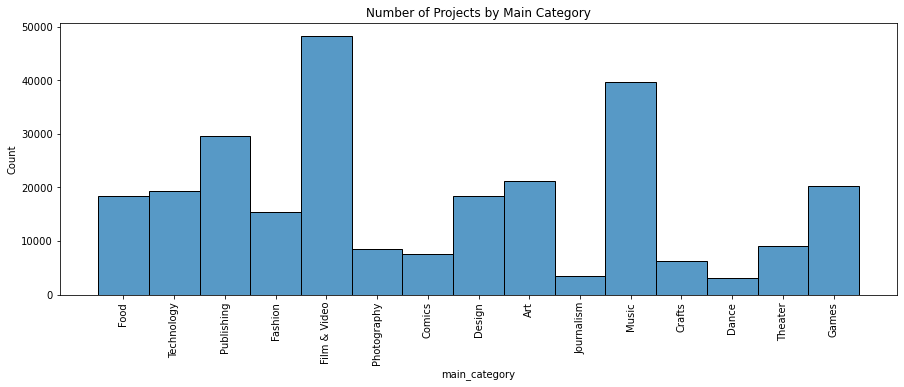

In [44]:
# visualization: number of projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Main Category")
sns.histplot(x = df3["main_category"], kde = False)


<AxesSubplot:title={'center':'Number of Projects by Failure/Success'}, xlabel='state', ylabel='Count'>

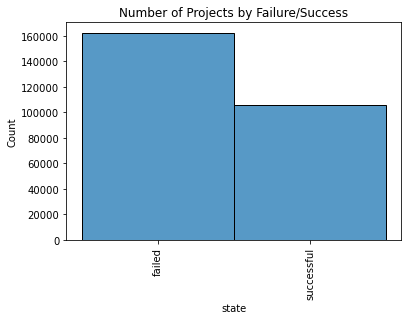

In [45]:
# visualization: number of projects by state
plt.title("Number of Projects by Failure/Success")
plt.xticks(rotation = 90)
sns.histplot(x = df3["state"], kde = False)

<AxesSubplot:title={'center':'Number of Projects by Country'}, xlabel='country', ylabel='Count'>

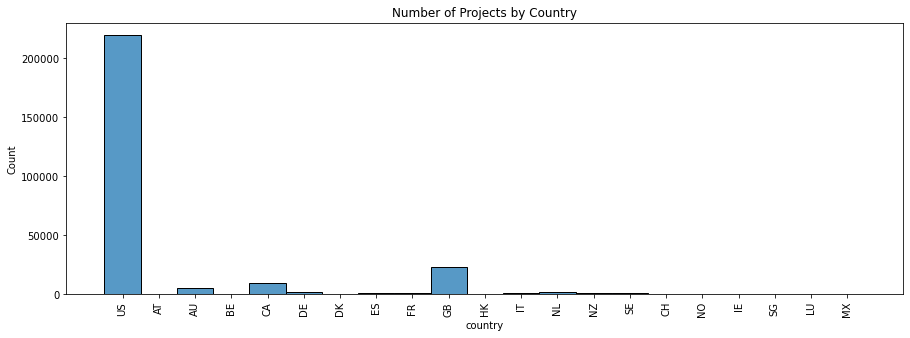

In [46]:
# visualization: number of projects by country

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Country")
sns.histplot(x = df3["country"], kde = False)

<AxesSubplot:title={'center':'Number of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='count'>

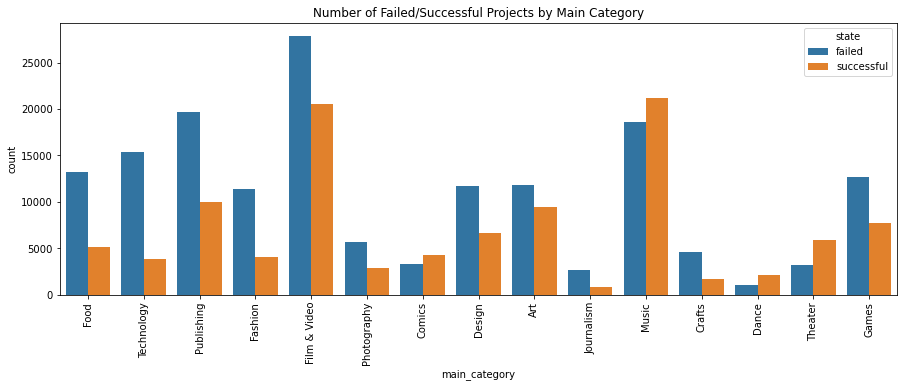

In [47]:
# visualization: number of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Failed/Successful Projects by Main Category")
sns.countplot(x = df3["main_category"], hue = df3["state"])

## <font color=#6AA121>Part 4: Variable Relationships</font>

It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
4.	What percentage of projects succeed and fail across each of the main categories?
5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
* Average Pledge by Main Category
* Average Num Backers by Main Category
* Average Pledge by State
* Average Num Backers by State
* Average Funding Goal by Main Category
* Average Funding Goal by State
* Average Percentage of Funding Collected by Main Category

***

### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [48]:
## average pledge across categoricial variables (groupby)
df3["usd_pledged"].groupby(df3["main_category"]).mean()

main_category
Art             2589.019436
Comics          4380.922113
Crafts          1329.263959
Dance           3365.535684
Design          7855.511467
Fashion         3780.720563
Film & Video    4922.866520
Food            4079.086604
Games           5965.395887
Journalism      2164.051442
Music           3580.819015
Photography     2782.012721
Publishing      2581.968444
Technology      6507.292791
Theater         3695.317231
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Main Category'}, xlabel='main_category', ylabel='usd_pledged'>

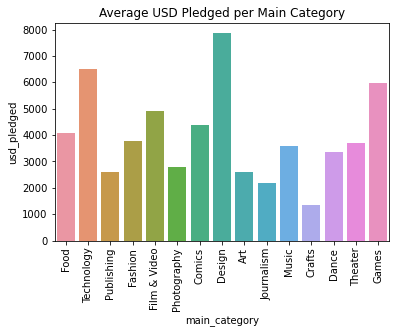

In [49]:
# visualizing Average USD Pledged per Main Category
plt.title("Average USD Pledged per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["usd_pledged"], ci = None)


In [50]:
df3["usd_pledged"].groupby(df3["category"]).mean()

category
3D Printing    11812.938885
Academic        1798.021149
Accessories     4956.709806
Action          2434.739589
Animals         2382.214298
                   ...     
Woodworking     1460.331442
Workshops       1357.862474
World Music     3533.569686
Young Adult     1299.772937
Zines           1884.080454
Name: usd_pledged, Length: 158, dtype: float64

In [51]:
df3["usd_pledged"].groupby(df3["country"]).mean()

country
AT    3705.705946
AU    2993.532201
BE    2280.544536
CA    3310.663181
CH    3787.044822
DE    3555.947595
DK    2681.813088
ES    3008.808373
FR    5130.604026
GB    3947.738323
HK    1187.642014
IE    4138.814922
IT    2065.093449
LU    1864.686741
MX       8.136906
NL    3576.029160
NO    1401.619219
NZ    3283.740898
SE    2130.378016
SG    2688.004516
US    4455.567259
Name: usd_pledged, dtype: float64

In [52]:
df3["usd_pledged"].groupby(df3["currency"]).mean()

currency
AUD    2993.532201
CAD    3310.663181
CHF    3787.044822
DKK    2681.813088
EUR    3514.860124
GBP    3947.738323
HKD    1187.642014
MXN       8.136906
NOK    1401.619219
NZD    3283.740898
SEK    2130.378016
SGD    2688.004516
USD    4455.567259
Name: usd_pledged, dtype: float64

In [53]:
#average usd pledged by state

df3["usd_pledged"].groupby(df3["state"]).mean()

state
failed        1072.565195
successful    9229.292022
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Success/Fail State'}, xlabel='state', ylabel='usd_pledged'>

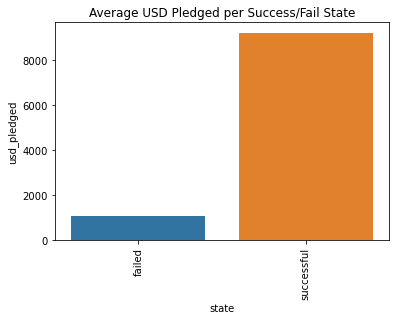

In [54]:
# visualizing Average USD Pledged per State
plt.title("Average USD Pledged per Success/Fail State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["usd_pledged"], ci = None)

In [55]:
## average number of backers across categorical variables (groupby)
df3["backers"].groupby(df3["main_category"]).mean()

main_category
Art              37.644006
Comics           98.043484
Crafts           24.780215
Dance            44.321156
Design           99.842025
Fashion          42.485670
Film & Video     52.003721
Food             47.093770
Games           115.957207
Journalism       32.370132
Music            51.279342
Photography      36.884824
Publishing       44.323954
Technology       61.761075
Theater          46.562128
Name: backers, dtype: float64

In [56]:
df3["backers"].groupby(df3["category"]).mean()

category
3D Printing    89.459384
Academic       28.328152
Accessories    59.790160
Action         24.705618
Animals        34.532663
                 ...    
Woodworking    22.070743
Workshops      21.630252
World Music    51.162146
Young Adult    21.267857
Zines          49.474510
Name: backers, Length: 158, dtype: float64

In [57]:
df3["backers"].groupby(df3["country"]).mean()

country
AT     39.091255
AU     45.936686
BE     38.248408
CA     48.590121
CH     41.492997
DE     50.685488
DK     40.322785
ES     51.508118
FR     61.873713
GB     52.514677
HK     61.209302
IE     51.884026
IT     34.340668
LU     33.156250
MX      9.250000
NL     42.229296
NO     27.106436
NZ     50.254678
SE     40.090180
SG    116.073529
US     59.304603
Name: backers, dtype: float64

In [58]:
df3["backers"].groupby(df3["currency"]).mean()

currency
AUD     45.936686
CAD     48.590121
CHF     41.492997
DKK     40.322785
EUR     47.649620
GBP     52.514677
HKD     61.209302
MXN      9.250000
NOK     27.106436
NZD     50.254678
SEK     40.090180
SGD    116.073529
USD     59.304603
Name: backers, dtype: float64

In [59]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         15.464693
successful    122.046978
Name: backers, dtype: float64

<AxesSubplot:title={'center':'Average Number Backers per State'}, xlabel='state', ylabel='backers'>

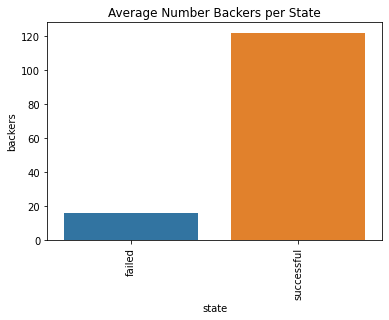

In [60]:
# visualizing Average Number Backers per State
plt.title("Average Number Backers per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["backers"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal (USD) per Main Category'}, xlabel='main_category', ylabel='goal_usd'>

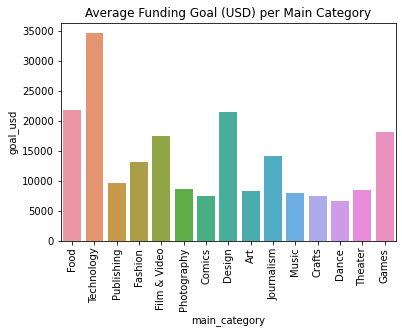

In [61]:
# visualizing Average Funding Goal (USD) per Main Category
plt.title("Average Funding Goal (USD) per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["goal_usd"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal (USD) per State'}, xlabel='state', ylabel='goal_usd'>

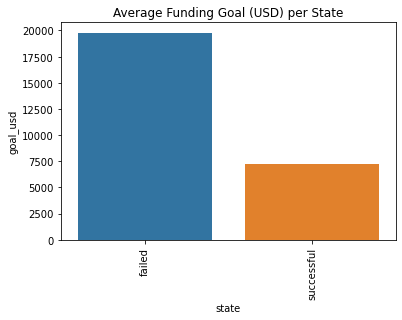

In [62]:
# visualizing Average Funding Goal (USD) per State
plt.title("Average Funding Goal (USD) per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["goal_usd"], ci = None)

<AxesSubplot:title={'center':'Avg Goal (USD) of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='goal_usd'>

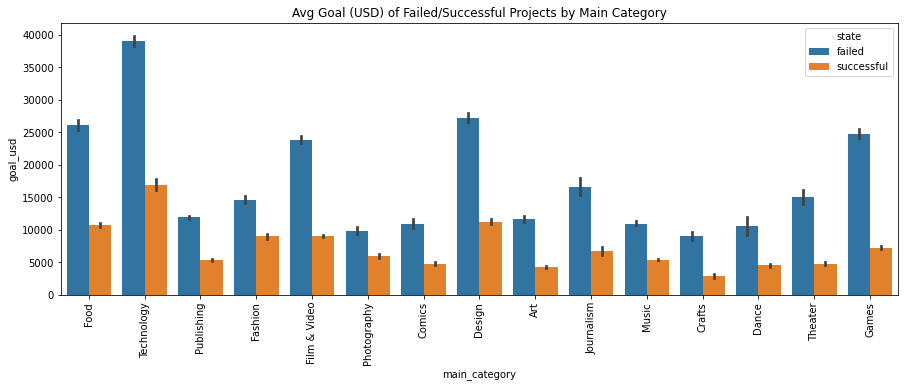

In [63]:
# visualization: avg goal (USD) of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Avg Goal (USD) of Failed/Successful Projects by Main Category")
sns.barplot(x = df3["main_category"], y = df3["goal_usd"], hue = df3["state"])

<AxesSubplot:title={'center':'Average Percentage Funded per Main Category'}, xlabel='main_category', ylabel='pct_funded'>

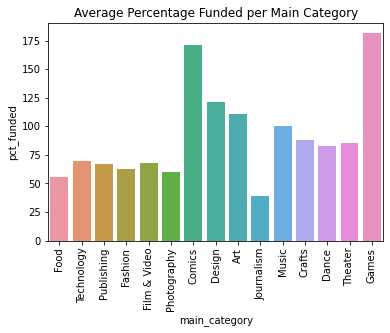

In [64]:
# visualizing Average Percentage Funded per Main Category
plt.title("Average Percentage Funded per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["pct_funded"], ci = None)

In [65]:
## averages of all numeric variables grouped by state (groupby)
df3["length_days"].groupby(df3["state"]).mean()

#shorter projects more successful

state
failed        34.465633
successful    31.554682
Name: length_days, dtype: float64

In [66]:
df3["usd_pledged"].groupby(df3["state"]).mean()

state
failed        1072.565195
successful    9229.292022
Name: usd_pledged, dtype: float64

In [67]:
df3["goal_usd"].groupby(df3["state"]).mean()

#lower goal more successful

state
failed        19793.719435
successful     7195.670260
Name: goal_usd, dtype: float64

<AxesSubplot:xlabel='state', ylabel='goal_usd'>

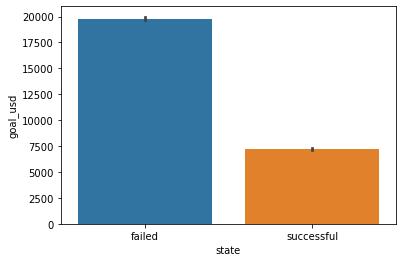

In [68]:
#visualization of goal (USD) by state

sns.barplot(data = df3, x = "state", y = "goal_usd")

In [69]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         15.464693
successful    122.046978
Name: backers, dtype: float64

In [70]:
df3["pct_funded"].groupby(df3["state"]).mean()

state
failed          8.994758
successful    216.446812
Name: pct_funded, dtype: float64

In [71]:
df3["avg_pledge_per_backer"].groupby(df3["state"]).mean()

state
failed        38.943399
successful    77.639426
Name: avg_pledge_per_backer, dtype: float64

In [72]:
df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer
count,268656.000000,2.686560e+05,268656.000000,268656.000000,268656.000000,268656.000000,268656.000000,268656.000000
mean,33.317261,1.487159e+04,4613.993162,57.511487,4290.400243,14823.779282,90.834754,54.209012
std,11.693837,3.456440e+04,12048.268007,115.612448,11049.177659,29638.370911,773.294479,60.202256
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000
25%,30.000000,2.000000e+03,45.000000,2.000000,35.000000,2000.000000,0.717286,12.203262
50%,30.000000,5.000000e+03,706.000000,14.000000,635.000000,5000.000000,18.250000,39.285714
75%,35.000000,1.500000e+04,4001.000000,58.000000,3674.000000,15000.000000,107.860000,72.857143
max,72.000000,2.000000e+06,281503.600000,973.000000,272523.000000,313869.600000,81100.000000,438.212733


# BINNING

In [280]:
# create bins for number of backers

bins = [-.1, 5, 20, 60, 100, 150000]
bin_labels = ["0-4", "5-19", "20-59", "60-99", "100+"]

df3["backers_group"] = pd.cut(df3["backers"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,goal_usd,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,13730.0,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,96450.0,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,19290.0,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,25720.0,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,25720.0,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0


In [285]:
df3.loc[(df3["backers"]==0) & (df3["main_category"]=="Dance")]

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,goal_usd,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary
49384,Dance,Dance,AU,AUD,2015-03-24 01:33:42,30,3000.0,0.0,0,failed,...,3107.100000,0.0,0.0,0-4,0-99,0-49,20-29,"2,000-4,999","2,000-4,999",0
49396,Dance,Dance,CA,CAD,2015-03-31 23:42:09,15,1000.0,0.0,0,failed,...,1000.500000,0.0,0.0,0-4,0-99,0-49,0-14,"0-1,999","0-1,999",0
49399,Dance,Dance,CA,CAD,2014-04-15 20:23:17,15,2000.0,0.0,0,failed,...,2001.000000,0.0,0.0,0-4,0-99,0-49,0-14,"0-1,999","2,000-4,999",0
49405,Dance,Dance,CA,CAD,2015-02-27 05:56:38,60,30000.0,0.0,0,failed,...,30015.000000,0.0,0.0,0-4,0-99,0-49,30-59,"15,000-29,999","15,000-32,999",0
49411,Dance,Dance,CA,CAD,2015-11-30 19:29:14,30,6000.0,0.0,0,failed,...,6003.000000,0.0,0.0,0-4,0-99,0-49,20-29,"5,000-14,999","5,000-14,999",0
49420,Dance,Dance,DE,EUR,2015-08-11 11:15:10,30,80000.0,0.0,0,failed,...,102880.000000,0.0,0.0,0-4,0-99,0-49,20-29,"30,000+","33,000+",0
49429,Dance,Dance,GB,GBP,2013-06-15 08:55:50,30,4000.0,0.0,0,failed,...,6340.800000,0.0,0.0,0-4,0-99,0-49,20-29,"2,000-4,999","5,000-14,999",0
49432,Dance,Dance,GB,GBP,2014-08-20 00:49:56,30,1500.0,0.0,0,failed,...,2377.800000,0.0,0.0,0-4,0-99,0-49,20-29,"0-1,999","2,000-4,999",0
49444,Dance,Dance,GB,GBP,2013-09-10 01:54:58,30,6500.0,0.0,0,failed,...,10303.800000,0.0,0.0,0-4,0-99,0-49,20-29,"5,000-14,999","5,000-14,999",0
49463,Dance,Dance,GB,GBP,2015-03-27 06:19:37,14,1000.0,0.0,0,failed,...,1585.200000,0.0,0.0,0-4,0-99,0-49,0-14,"0-1,999","0-1,999",0


In [282]:
# create bins for usd pledged

bins = [-.1, 100, 1000, 5000, 100000, 300000]
bin_labels = ["0-99", "100-999", "1,000-4,999", "5,000-99,999", "100,000-300,000"]

df3["usd_pledged_group"] = pd.cut(df3["usd_pledged"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,goal_usd,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,13730.0,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,96450.0,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,19290.0,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,25720.0,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,25720.0,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0


In [284]:
# create bins for pct_funded

bins = [-.1, 50, 90, 100, 110, 550000]
bin_labels = ["0-49", "50-89", "90-99", "100-109", "110+"]

df3["pct_funded_group"] = pd.cut(df3["pct_funded"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,goal_usd,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,13730.0,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,96450.0,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,19290.0,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,25720.0,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,25720.0,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0


In [286]:
# create bins for length_days

bins = [-.1, 15, 20, 30, 60, 101]
bin_labels = ["0-14", "15-19", "20-29", "30-59", "60-100"]

df3["length_days_group"] = pd.cut(df3["length_days"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,goal_usd,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,13730.0,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,96450.0,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,19290.0,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,25720.0,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,25720.0,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0


In [77]:
df3.describe()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer
count,268656.000000,2.686560e+05,268656.000000,268656.000000,268656.000000,268656.000000,268656.000000,268656.000000
mean,33.317261,1.487159e+04,4613.993162,57.511487,4290.400243,14823.779282,90.834754,54.209012
std,11.693837,3.456440e+04,12048.268007,115.612448,11049.177659,29638.370911,773.294479,60.202256
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.150000,0.000000,0.000000
25%,30.000000,2.000000e+03,45.000000,2.000000,35.000000,2000.000000,0.717286,12.203262
50%,30.000000,5.000000e+03,706.000000,14.000000,635.000000,5000.000000,18.250000,39.285714
75%,35.000000,1.500000e+04,4001.000000,58.000000,3674.000000,15000.000000,107.860000,72.857143
max,72.000000,2.000000e+06,281503.600000,973.000000,272523.000000,313869.600000,81100.000000,438.212733


In [287]:
# create bins for goal

bins = [-.1, 2000, 5000, 15000, 30000, 10000000]
bin_labels = ["0-1,999", "2,000-4,999", "5,000-14,999", "15,000-29,999", "30,000+"]

df3["goal_group"] = pd.cut(df3["goal"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,goal_usd,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,13730.0,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,96450.0,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,19290.0,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,25720.0,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,25720.0,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0


In [289]:
# create bins for goal_usd

bins = [-.1, 2000, 5000, 15000, 33000, 3000000]
bin_labels = ["0-1,999", "2,000-4,999", "5,000-14,999", "15,000-32,999", "33,000+"]

df3["goal_usd_group"] = pd.cut(df3["goal_usd"], bins, labels = bin_labels)

df3.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,goal_usd,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,13730.0,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,96450.0,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,19290.0,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,25720.0,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,25720.0,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0


# Visuals with Bins

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='main_category', ylabel='usd_pledged'>

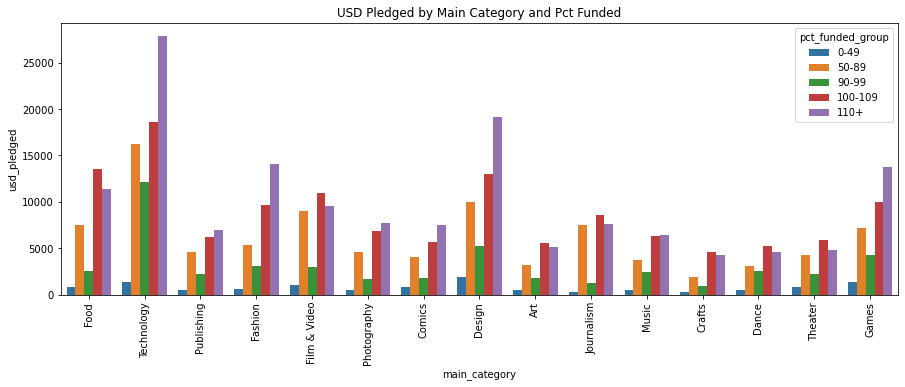

In [290]:
# average number of backers and pledges by main category 
# include the variable "pct_funded" to get a better picture of the projects that met/exceeded their goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["main_category"], y = df3["usd_pledged"], hue = df3["pct_funded_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Backers'}, xlabel='main_category', ylabel='usd_pledged'>

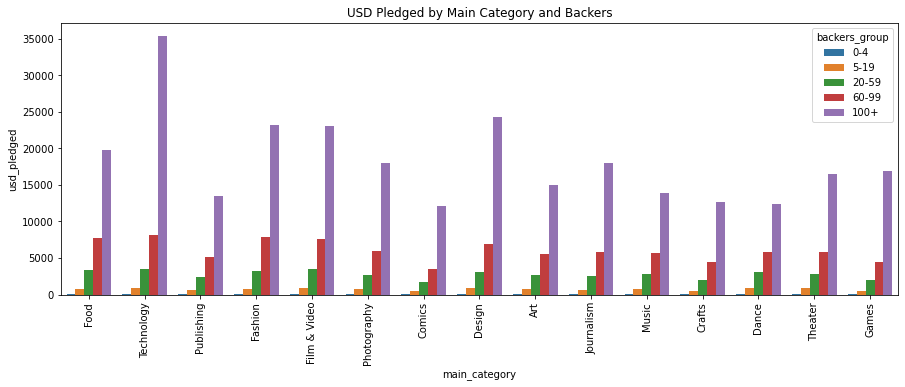

In [291]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Backers")
sns.barplot(x=df3["main_category"], y = df3["usd_pledged"], hue = df3["backers_group"], ci=None)

<AxesSubplot:title={'center':'Pct Funded by Main Category and USD Pledged Group'}, xlabel='main_category', ylabel='pct_funded'>

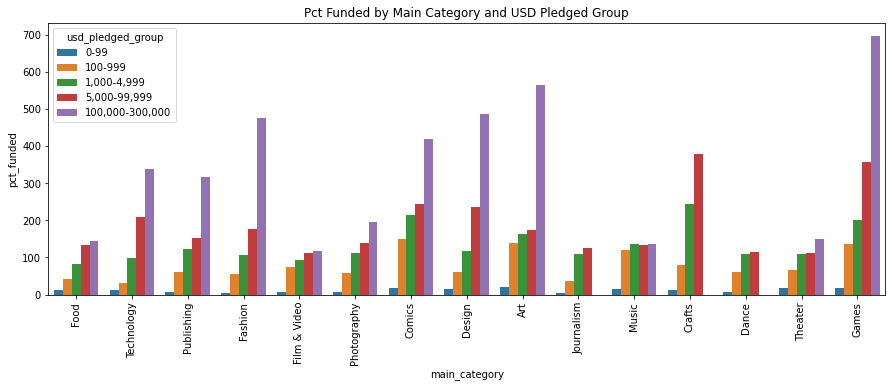

In [292]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Pct Funded by Main Category and USD Pledged Group")
sns.barplot(x=df3["main_category"], y = df3["pct_funded"], hue = df3["usd_pledged_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='pct_funded_group', ylabel='usd_pledged'>

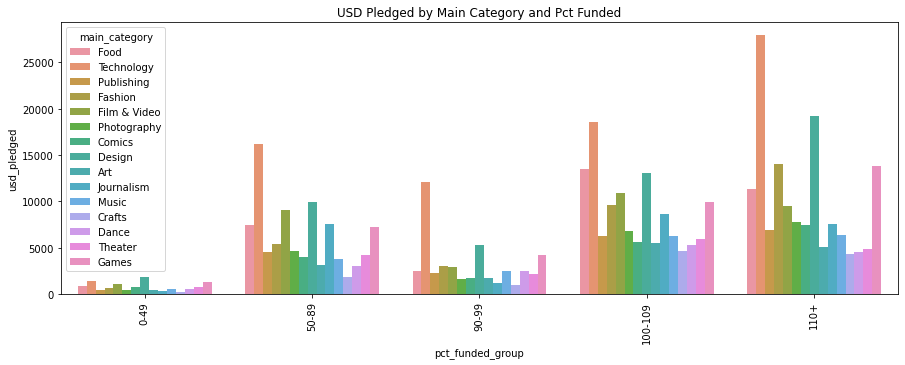

In [293]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["pct_funded_group"], y = df3["usd_pledged"], hue = df3["main_category"], ci=None)

<AxesSubplot:title={'center':'Average Goal (USD) by Main Category and State'}, xlabel='main_category', ylabel='goal_usd'>

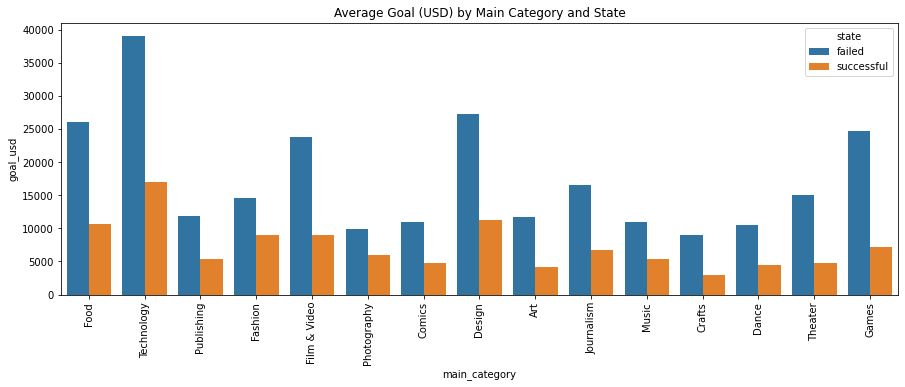

In [1140]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Goal (USD) by Main Category and State")
sns.barplot(data = df3, x="main_category", y= "goal_usd", hue = "state", ci = None)

# Creating Datasets of Sub-Groups (Numerical Groupings)

In [745]:
df3["state_binary"]=np.where(df3["state"]=="successful", 1, 0)

In [746]:
# Dataset of successful campaigns

df3_successful = df3.copy()
df3_successful["Success"] = np.where(df3["state"]=="successful", "Y", "N")
df3_successful.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary,Success
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0,N
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0,N
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0,N
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0,N
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0,N


In [747]:
df3_successful.drop(df3_successful.loc[df3_successful["Success"]=="N"].index, inplace = True)
df3_successful.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105985 entries, 10 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          105985 non-null  object        
 1   category               105985 non-null  object        
 2   country                105985 non-null  object        
 3   currency               105985 non-null  object        
 4   launched               105985 non-null  datetime64[ns]
 5   length_days            105985 non-null  int64         
 6   goal                   105985 non-null  float64       
 7   pledged                105985 non-null  float64       
 8   backers                105985 non-null  int64         
 9   state                  105985 non-null  object        
 10  usd_pledged            105985 non-null  float64       
 11  goal_usd               105985 non-null  float64       
 12  pct_funded             105985 non-null  flo

In [748]:
# Dataset of failed campaigns

df3_failed = df3.copy()
df3_failed["Success"] = np.where(df3["state"]=="successful", "Y", "N")
df3_failed.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary,Success
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0,N
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0,N
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0,N
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0,N
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0,N


In [749]:
df3_failed.drop(df3_failed.loc[df3_failed["Success"]=="Y"].index, inplace = True)
df3_failed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162671 entries, 0 to 281853
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          162671 non-null  object        
 1   category               162671 non-null  object        
 2   country                162671 non-null  object        
 3   currency               162671 non-null  object        
 4   launched               162671 non-null  datetime64[ns]
 5   length_days            162671 non-null  int64         
 6   goal                   162671 non-null  float64       
 7   pledged                162671 non-null  float64       
 8   backers                162671 non-null  int64         
 9   state                  162671 non-null  object        
 10  usd_pledged            162671 non-null  float64       
 11  goal_usd               162671 non-null  float64       
 12  pct_funded             162671 non-null  floa

In [530]:
#df3.to_excel("Kickstarter_df3.xlsx")

### Backers Groups: 
- df3_backers_1: 0-4     99,254 rows
- df3_backers_2: 5-19    50,527 rows
- df3_backers_3: 20-59   53,652 rows
- df3_backers_4: 60-99   23,647 rows
- df3_backers_5: 100+    41,576 rows

In [751]:
df3_backers_1 = df3.copy()
df3_backers_1["Backers_0-4"] = np.where(df3["backers_group"]=="0-4", "Y", "N")
df3_backers_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [752]:
df3_backers_1.drop(df3_backers_1.loc[df3_backers_1["Backers_0-4"]=="N"].index, inplace = True)
df3_backers_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99254 entries, 6 to 281851
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          99254 non-null  object        
 1   category               99254 non-null  object        
 2   country                99254 non-null  object        
 3   currency               99254 non-null  object        
 4   launched               99254 non-null  datetime64[ns]
 5   length_days            99254 non-null  int64         
 6   goal                   99254 non-null  float64       
 7   pledged                99254 non-null  float64       
 8   backers                99254 non-null  int64         
 9   state                  99254 non-null  object        
 10  usd_pledged            99254 non-null  float64       
 11  goal_usd               99254 non-null  float64       
 12  pct_funded             99254 non-null  float64       
 13  

In [753]:
df3_backers_2 = df3.copy()
df3_backers_2["Backers_5-19"] = np.where(df3_backers_2["backers_group"]=="5-19", "Y", "N")

In [754]:
df3_backers_2.drop(df3_backers_2.loc[df3_backers_2["Backers_5-19"]=="N"].index, inplace = True)
df3_backers_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50527 entries, 3 to 281853
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          50527 non-null  object        
 1   category               50527 non-null  object        
 2   country                50527 non-null  object        
 3   currency               50527 non-null  object        
 4   launched               50527 non-null  datetime64[ns]
 5   length_days            50527 non-null  int64         
 6   goal                   50527 non-null  float64       
 7   pledged                50527 non-null  float64       
 8   backers                50527 non-null  int64         
 9   state                  50527 non-null  object        
 10  usd_pledged            50527 non-null  float64       
 11  goal_usd               50527 non-null  float64       
 12  pct_funded             50527 non-null  float64       
 13  

In [755]:
df3_backers_3 = df3.copy()
df3_backers_3["Backers_20-59"] = np.where(df3_backers_3["backers_group"]=="20-59", "Y", "N")

In [756]:
df3_backers_3.drop(df3_backers_3.loc[df3_backers_3["Backers_20-59"]=="N"].index, inplace = True)
df3_backers_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53652 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          53652 non-null  object        
 1   category               53652 non-null  object        
 2   country                53652 non-null  object        
 3   currency               53652 non-null  object        
 4   launched               53652 non-null  datetime64[ns]
 5   length_days            53652 non-null  int64         
 6   goal                   53652 non-null  float64       
 7   pledged                53652 non-null  float64       
 8   backers                53652 non-null  int64         
 9   state                  53652 non-null  object        
 10  usd_pledged            53652 non-null  float64       
 11  goal_usd               53652 non-null  float64       
 12  pct_funded             53652 non-null  float64       
 13  

In [757]:
df3_backers_4 = df3.copy()
df3_backers_4["Backers_60-99"] = np.where(df3_backers_4["backers_group"]=="60-99", "Y", "N")

In [758]:
df3_backers_4.drop(df3_backers_4.loc[df3_backers_4["Backers_60-99"]=="N"].index, inplace = True)
df3_backers_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23647 entries, 10 to 281846
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          23647 non-null  object        
 1   category               23647 non-null  object        
 2   country                23647 non-null  object        
 3   currency               23647 non-null  object        
 4   launched               23647 non-null  datetime64[ns]
 5   length_days            23647 non-null  int64         
 6   goal                   23647 non-null  float64       
 7   pledged                23647 non-null  float64       
 8   backers                23647 non-null  int64         
 9   state                  23647 non-null  object        
 10  usd_pledged            23647 non-null  float64       
 11  goal_usd               23647 non-null  float64       
 12  pct_funded             23647 non-null  float64       
 13 

In [759]:
df3_backers_5 = df3.copy()
df3_backers_5["Backers_100+"] = np.where(df3_backers_5["backers_group"]=="100+", "Y", "N")

In [760]:
df3_backers_5.drop(df3_backers_5.loc[df3_backers_5["Backers_100+"]=="N"].index, inplace = True)
df3_backers_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41576 entries, 20 to 281854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          41576 non-null  object        
 1   category               41576 non-null  object        
 2   country                41576 non-null  object        
 3   currency               41576 non-null  object        
 4   launched               41576 non-null  datetime64[ns]
 5   length_days            41576 non-null  int64         
 6   goal                   41576 non-null  float64       
 7   pledged                41576 non-null  float64       
 8   backers                41576 non-null  int64         
 9   state                  41576 non-null  object        
 10  usd_pledged            41576 non-null  float64       
 11  goal_usd               41576 non-null  float64       
 12  pct_funded             41576 non-null  float64       
 13 

### USD Pledged Groups: 
- df3_usd_pledged_1: 0-99               86,555 rows
- df3_usd_pledged_2: 100-999            62,345 rows
- df3_usd_pledged_3: 1,000-4,999        63,623 rows
- df3_usd_pledged_4: 5,000-99,999       55,513 rows
- df3_usd_pledged_5: 100,000-300,000    620 rows

In [761]:
df3_usd_pledged_1 = df3.copy()
df3_usd_pledged_1["USD_Pledged_0-99"] = np.where(df3_usd_pledged_1["usd_pledged_group"]=="0-99", "Y", "N")

In [762]:
df3_usd_pledged_1.drop(df3_usd_pledged_1.loc[df3_usd_pledged_1["USD_Pledged_0-99"]=="N"].index, inplace = True)
df3_usd_pledged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86555 entries, 3 to 281845
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          86555 non-null  object        
 1   category               86555 non-null  object        
 2   country                86555 non-null  object        
 3   currency               86555 non-null  object        
 4   launched               86555 non-null  datetime64[ns]
 5   length_days            86555 non-null  int64         
 6   goal                   86555 non-null  float64       
 7   pledged                86555 non-null  float64       
 8   backers                86555 non-null  int64         
 9   state                  86555 non-null  object        
 10  usd_pledged            86555 non-null  float64       
 11  goal_usd               86555 non-null  float64       
 12  pct_funded             86555 non-null  float64       
 13  

In [763]:
df3_usd_pledged_2 = df3.copy()
df3_usd_pledged_2["USD_Pledged_100-999"] = np.where(df3_usd_pledged_2["usd_pledged_group"]=="100-999", "Y", "N")

In [764]:
df3_usd_pledged_2.drop(df3_usd_pledged_2.loc[df3_usd_pledged_2["USD_Pledged_100-999"]=="N"].index, inplace = True)
df3_usd_pledged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62345 entries, 5 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          62345 non-null  object        
 1   category               62345 non-null  object        
 2   country                62345 non-null  object        
 3   currency               62345 non-null  object        
 4   launched               62345 non-null  datetime64[ns]
 5   length_days            62345 non-null  int64         
 6   goal                   62345 non-null  float64       
 7   pledged                62345 non-null  float64       
 8   backers                62345 non-null  int64         
 9   state                  62345 non-null  object        
 10  usd_pledged            62345 non-null  float64       
 11  goal_usd               62345 non-null  float64       
 12  pct_funded             62345 non-null  float64       
 13  

In [765]:
df3_usd_pledged_3 = df3.copy()
df3_usd_pledged_3["USD_Pledged_1,000-4,999"] = np.where(df3_usd_pledged_3["usd_pledged_group"]=="1,000-4,999", "Y", "N")

In [766]:
df3_usd_pledged_3.drop(df3_usd_pledged_3.loc[df3_usd_pledged_3["USD_Pledged_1,000-4,999"]=="N"].index, inplace = True)
df3_usd_pledged_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63623 entries, 0 to 281846
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   main_category            63623 non-null  object        
 1   category                 63623 non-null  object        
 2   country                  63623 non-null  object        
 3   currency                 63623 non-null  object        
 4   launched                 63623 non-null  datetime64[ns]
 5   length_days              63623 non-null  int64         
 6   goal                     63623 non-null  float64       
 7   pledged                  63623 non-null  float64       
 8   backers                  63623 non-null  int64         
 9   state                    63623 non-null  object        
 10  usd_pledged              63623 non-null  float64       
 11  goal_usd                 63623 non-null  float64       
 12  pct_funded               63623 

In [767]:
df3_usd_pledged_4 = df3.copy()
df3_usd_pledged_4["USD_Pledged_5,000-99,999"] = np.where(df3_usd_pledged_4["usd_pledged_group"]=="5,000-99,999", "Y", "N")

In [768]:
df3_usd_pledged_4.drop(df3_usd_pledged_4.loc[df3_usd_pledged_4["USD_Pledged_5,000-99,999"]=="N"].index, inplace = True)
df3_usd_pledged_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55513 entries, 18 to 281854
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   main_category             55513 non-null  object        
 1   category                  55513 non-null  object        
 2   country                   55513 non-null  object        
 3   currency                  55513 non-null  object        
 4   launched                  55513 non-null  datetime64[ns]
 5   length_days               55513 non-null  int64         
 6   goal                      55513 non-null  float64       
 7   pledged                   55513 non-null  float64       
 8   backers                   55513 non-null  int64         
 9   state                     55513 non-null  object        
 10  usd_pledged               55513 non-null  float64       
 11  goal_usd                  55513 non-null  float64       
 12  pct_funded      

In [769]:
df3_usd_pledged_5 = df3.copy()
df3_usd_pledged_5["USD_Pledged_100,000-300,000"] = np.where(df3_usd_pledged_5["usd_pledged_group"]=="100,000-300,000", "Y", "N")

In [770]:
df3_usd_pledged_5.drop(df3_usd_pledged_5.loc[df3_usd_pledged_5["USD_Pledged_100,000-300,000"]=="N"].index, inplace = True)
df3_usd_pledged_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 20 to 278144
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   main_category                620 non-null    object        
 1   category                     620 non-null    object        
 2   country                      620 non-null    object        
 3   currency                     620 non-null    object        
 4   launched                     620 non-null    datetime64[ns]
 5   length_days                  620 non-null    int64         
 6   goal                         620 non-null    float64       
 7   pledged                      620 non-null    float64       
 8   backers                      620 non-null    int64         
 9   state                        620 non-null    object        
 10  usd_pledged                  620 non-null    float64       
 11  goal_usd                     620 non-null

In [771]:
#df3_backers_1.to_excel("df3_backers_1.xlsx")
#df3_backers_2.to_excel("df3_backers_2.xlsx")
#df3_backers_3.to_excel("df3_backers_3.xlsx")
#df3_backers_4.to_excel("df3_backers_4.xlsx")
#df3_backers_5.to_excel("df3_backers_5.xlsx")

In [772]:
#df3.to_excel("Kickstarter_df3.xlsx")

In [773]:
#df3_usd_pledged_1.to_excel("df3_usd_pledged_1.xlsx")
#df3_usd_pledged_2.to_excel("df3_usd_pledged_2.xlsx")
#df3_usd_pledged_3.to_excel("df3_usd_pledged_3.xlsx")
#df3_usd_pledged_4.to_excel("df3_usd_pledged_4.xlsx")
#df3_usd_pledged_5.to_excel("df3_usd_pledged_5.xlsx")

##### Pct Funded Groups: 
- df3_pct_funded_1: 0-49           157,358 rows
- df3_pct_funded_2: 50-89            5,172 rows
- df3_pct_funded_3: 90-99            3,552 rows
- df3_pct_funded_4: 100-109         40,604 rows
- df3_pct_funded_5: 110+            61,970 rows

In [774]:
df3_pct_funded_1 = df3.copy()
df3_pct_funded_1["Pct_Funded_0-49"] = np.where(df3_pct_funded_1["pct_funded_group"]=="0-49", "Y", "N")

In [775]:
df3_pct_funded_1.drop(df3_pct_funded_1.loc[df3_pct_funded_1["Pct_Funded_0-49"]=="N"].index, inplace = True)
df3_pct_funded_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157358 entries, 0 to 281853
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          157358 non-null  object        
 1   category               157358 non-null  object        
 2   country                157358 non-null  object        
 3   currency               157358 non-null  object        
 4   launched               157358 non-null  datetime64[ns]
 5   length_days            157358 non-null  int64         
 6   goal                   157358 non-null  float64       
 7   pledged                157358 non-null  float64       
 8   backers                157358 non-null  int64         
 9   state                  157358 non-null  object        
 10  usd_pledged            157358 non-null  float64       
 11  goal_usd               157358 non-null  float64       
 12  pct_funded             157358 non-null  floa

In [776]:
df3_pct_funded_2 = df3.copy()
df3_pct_funded_2["Pct_Funded_50-89"] = np.where(df3_pct_funded_2["pct_funded_group"]=="50-89", "Y", "N")

In [777]:
df3_pct_funded_2.drop(df3_pct_funded_2.loc[df3_pct_funded_2["Pct_Funded_50-89"]=="N"].index, inplace = True)
df3_pct_funded_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5172 entries, 50 to 281750
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          5172 non-null   object        
 1   category               5172 non-null   object        
 2   country                5172 non-null   object        
 3   currency               5172 non-null   object        
 4   launched               5172 non-null   datetime64[ns]
 5   length_days            5172 non-null   int64         
 6   goal                   5172 non-null   float64       
 7   pledged                5172 non-null   float64       
 8   backers                5172 non-null   int64         
 9   state                  5172 non-null   object        
 10  usd_pledged            5172 non-null   float64       
 11  goal_usd               5172 non-null   float64       
 12  pct_funded             5172 non-null   float64       
 13  

In [778]:
df3_pct_funded_3 = df3.copy()
df3_pct_funded_3["Pct_Funded_90-99"] = np.where(df3_pct_funded_3["pct_funded_group"]=="90-99", "Y", "N")

In [779]:
df3_pct_funded_3.drop(df3_pct_funded_3.loc[df3_pct_funded_3["Pct_Funded_90-99"]=="N"].index, inplace = True)
df3_pct_funded_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3552 entries, 68 to 281836
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          3552 non-null   object        
 1   category               3552 non-null   object        
 2   country                3552 non-null   object        
 3   currency               3552 non-null   object        
 4   launched               3552 non-null   datetime64[ns]
 5   length_days            3552 non-null   int64         
 6   goal                   3552 non-null   float64       
 7   pledged                3552 non-null   float64       
 8   backers                3552 non-null   int64         
 9   state                  3552 non-null   object        
 10  usd_pledged            3552 non-null   float64       
 11  goal_usd               3552 non-null   float64       
 12  pct_funded             3552 non-null   float64       
 13  

In [780]:
df3_pct_funded_4 = df3.copy()
df3_pct_funded_4["Pct_Funded_100-109"] = np.where(df3_pct_funded_4["pct_funded_group"]=="100-109", "Y", "N")

In [781]:
df3_pct_funded_4.drop(df3_pct_funded_4.loc[df3_pct_funded_4["Pct_Funded_100-109"]=="N"].index, inplace = True)
df3_pct_funded_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40604 entries, 11 to 281854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          40604 non-null  object        
 1   category               40604 non-null  object        
 2   country                40604 non-null  object        
 3   currency               40604 non-null  object        
 4   launched               40604 non-null  datetime64[ns]
 5   length_days            40604 non-null  int64         
 6   goal                   40604 non-null  float64       
 7   pledged                40604 non-null  float64       
 8   backers                40604 non-null  int64         
 9   state                  40604 non-null  object        
 10  usd_pledged            40604 non-null  float64       
 11  goal_usd               40604 non-null  float64       
 12  pct_funded             40604 non-null  float64       
 13 

In [782]:
df3_pct_funded_5 = df3.copy()
df3_pct_funded_5["Pct_Funded_110+"] = np.where(df3_pct_funded_5["pct_funded_group"]=="110+", "Y", "N")

In [783]:
df3_pct_funded_5.drop(df3_pct_funded_5.loc[df3_pct_funded_5["Pct_Funded_110+"]=="N"].index, inplace = True)
df3_pct_funded_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61970 entries, 10 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          61970 non-null  object        
 1   category               61970 non-null  object        
 2   country                61970 non-null  object        
 3   currency               61970 non-null  object        
 4   launched               61970 non-null  datetime64[ns]
 5   length_days            61970 non-null  int64         
 6   goal                   61970 non-null  float64       
 7   pledged                61970 non-null  float64       
 8   backers                61970 non-null  int64         
 9   state                  61970 non-null  object        
 10  usd_pledged            61970 non-null  float64       
 11  goal_usd               61970 non-null  float64       
 12  pct_funded             61970 non-null  float64       
 13 

### Length Days Groups: 
- df3_length_days_1: 0-14            14,299 rows
- df3_length_days_2: 15-19           10,178 rows
- df3_length_days_3: 20-29           153,286 rows
- df3_length_days_4: 30-59           89,387 rows
- df3_length_days_5: 60-100           1,506 rows

In [784]:
df3_length_days_1 = df3.copy()
df3_length_days_1["Length_Days_0-14"] = np.where(df3_length_days_1["length_days_group"]=="0-14", "Y", "N")

In [785]:
df3_length_days_1.drop(df3_length_days_1.loc[df3_length_days_1["Length_Days_0-14"]=="N"].index, inplace = True)
df3_length_days_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14299 entries, 48 to 281823
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          14299 non-null  object        
 1   category               14299 non-null  object        
 2   country                14299 non-null  object        
 3   currency               14299 non-null  object        
 4   launched               14299 non-null  datetime64[ns]
 5   length_days            14299 non-null  int64         
 6   goal                   14299 non-null  float64       
 7   pledged                14299 non-null  float64       
 8   backers                14299 non-null  int64         
 9   state                  14299 non-null  object        
 10  usd_pledged            14299 non-null  float64       
 11  goal_usd               14299 non-null  float64       
 12  pct_funded             14299 non-null  float64       
 13 

In [1263]:
mod8 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_length_days_1).fit()

mod8.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.277028
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                14299
Model:                          Logit   Df Residuals:                    14296
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.6003
Time:                        16:07:47   Log-Likelihood:                -3961.2
converged:                       True   LL-Null:                       -9911.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0858      0.003    -27.124      0.000      -0.092      -0.080
goal_usd       -0.0009   2.26e-05    -40.767      0.000      -0.001      -0.001
backers         0.1916      0.004     50.911      0.000       0.184       0.199
===============================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1264]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_length_1_odds = pd.DataFrame(np.exp(mod8.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_length_1_odds["pvalue"] = mod8.pvalues

## create a variable to quickly determine sig

df3_length_1_odds["Sig"] = np.where(df3_length_1_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_length_1_odds

,OR,pvalue,Sig
length_days,0.917754,5.071453e-162,Sig
goal_usd,0.999078,0.000000e+00,Sig
backers,1.211139,0.000000e+00,Sig


In [786]:
df3_length_days_2 = df3.copy()
df3_length_days_2["Length_Days_15-19"] = np.where(df3_length_days_2["length_days_group"]=="15-19", "Y", "N")

In [787]:
df3_length_days_2.drop(df3_length_days_2.loc[df3_length_days_2["Length_Days_15-19"]=="N"].index, inplace = True)
df3_length_days_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10178 entries, 39 to 281816
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          10178 non-null  object        
 1   category               10178 non-null  object        
 2   country                10178 non-null  object        
 3   currency               10178 non-null  object        
 4   launched               10178 non-null  datetime64[ns]
 5   length_days            10178 non-null  int64         
 6   goal                   10178 non-null  float64       
 7   pledged                10178 non-null  float64       
 8   backers                10178 non-null  int64         
 9   state                  10178 non-null  object        
 10  usd_pledged            10178 non-null  float64       
 11  goal_usd               10178 non-null  float64       
 12  pct_funded             10178 non-null  float64       
 13 

In [1265]:
mod9 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_length_days_2).fit()

mod9.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.293932
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                10178
Model:                          Logit   Df Residuals:                    10175
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5751
Time:                        16:09:13   Log-Likelihood:                -2991.6
converged:                       True   LL-Null:                       -7040.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0445      0.002    -19.219      0.000      -0.049      -0.040
goal_usd       -0.0006   1.71e-05    -34.147      0.000      -0.001      -0.001
backers         0.1255      0.003     43.258      0.000       0.120       0.131
===============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1266]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_length_2_odds = pd.DataFrame(np.exp(mod9.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_length_2_odds["pvalue"] = mod9.pvalues

## create a variable to quickly determine sig

df3_length_2_odds["Sig"] = np.where(df3_length_2_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_length_2_odds

,OR,pvalue,Sig
length_days,0.956508,2.590156e-82,Sig
goal_usd,0.999417,1.484923e-255,Sig
backers,1.133716,0.000000e+00,Sig


In [788]:
df3_length_days_3 = df3.copy()
df3_length_days_3["Length_Days_20-29"] = np.where(df3_length_days_3["length_days_group"]=="20-29", "Y", "N")

In [789]:
df3_length_days_3.drop(df3_length_days_3.loc[df3_length_days_3["Length_Days_20-29"]=="N"].index, inplace = True)
df3_length_days_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153286 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          153286 non-null  object        
 1   category               153286 non-null  object        
 2   country                153286 non-null  object        
 3   currency               153286 non-null  object        
 4   launched               153286 non-null  datetime64[ns]
 5   length_days            153286 non-null  int64         
 6   goal                   153286 non-null  float64       
 7   pledged                153286 non-null  float64       
 8   backers                153286 non-null  int64         
 9   state                  153286 non-null  object        
 10  usd_pledged            153286 non-null  float64       
 11  goal_usd               153286 non-null  float64       
 12  pct_funded             153286 non-null  floa

In [1267]:
mod10 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_length_days_3).fit()

mod10.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.290770
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:               153286
Model:                          Logit   Df Residuals:                   153283
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5640
Time:                        16:11:36   Log-Likelihood:                -44571.
converged:                       True   LL-Null:                   -1.0224e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0362      0.000    -98.223      0.000      -0.037      -0.035
goal_usd       -0.0003   2.46e-06   -132.301      0.000      -0.000      -0.000
backers         0.0722      0.000    164.803      0.000       0.071       0.073
===============================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1268]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_length_3_odds = pd.DataFrame(np.exp(mod10.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_length_3_odds["pvalue"] = mod10.pvalues

## create a variable to quickly determine sig

df3_length_3_odds["Sig"] = np.where(df3_length_3_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_length_3_odds

,OR,pvalue,Sig
length_days,0.964466,0.0,Sig
goal_usd,0.999674,0.0,Sig
backers,1.074867,0.0,Sig


In [790]:
df3_length_days_4 = df3.copy()
df3_length_days_4["Length_Days_30-59"] = np.where(df3_length_days_4["length_days_group"]=="30-59", "Y", "N")

In [791]:
df3_length_days_4.drop(df3_length_days_4.loc[df3_length_days_4["Length_Days_30-59"]=="N"].index, inplace = True)
df3_length_days_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89387 entries, 1 to 281854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          89387 non-null  object        
 1   category               89387 non-null  object        
 2   country                89387 non-null  object        
 3   currency               89387 non-null  object        
 4   launched               89387 non-null  datetime64[ns]
 5   length_days            89387 non-null  int64         
 6   goal                   89387 non-null  float64       
 7   pledged                89387 non-null  float64       
 8   backers                89387 non-null  int64         
 9   state                  89387 non-null  object        
 10  usd_pledged            89387 non-null  float64       
 11  goal_usd               89387 non-null  float64       
 12  pct_funded             89387 non-null  float64       
 13  

In [1269]:
mod11 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_length_days_4).fit()

mod11.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.298476
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                89387
Model:                          Logit   Df Residuals:                    89384
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5490
Time:                        16:13:54   Log-Likelihood:                -26680.
converged:                       True   LL-Null:                       -59152.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0197      0.000    -67.832      0.000      -0.020      -0.019
goal_usd       -0.0002   2.44e-06   -101.865      0.000      -0.000      -0.000
backers         0.0558      0.000    122.802      0.000       0.055       0.057
===============================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1270]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_length_4_odds = pd.DataFrame(np.exp(mod11.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_length_4_odds["pvalue"] = mod11.pvalues

## create a variable to quickly determine sig

df3_length_4_odds["Sig"] = np.where(df3_length_4_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_length_4_odds

,OR,pvalue,Sig
length_days,0.980467,0.0,Sig
goal_usd,0.999751,0.0,Sig
backers,1.057427,0.0,Sig


In [792]:
df3_length_days_5 = df3.copy()
df3_length_days_5["Length_Days_60-100"] = np.where(df3_length_days_5["length_days_group"]=="60-100", "Y", "N")

In [793]:
df3_length_days_5.drop(df3_length_days_5.loc[df3_length_days_5["Length_Days_60-100"]=="N"].index, inplace = True)
df3_length_days_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1506 entries, 3906 to 280976
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          1506 non-null   object        
 1   category               1506 non-null   object        
 2   country                1506 non-null   object        
 3   currency               1506 non-null   object        
 4   launched               1506 non-null   datetime64[ns]
 5   length_days            1506 non-null   int64         
 6   goal                   1506 non-null   float64       
 7   pledged                1506 non-null   float64       
 8   backers                1506 non-null   int64         
 9   state                  1506 non-null   object        
 10  usd_pledged            1506 non-null   float64       
 11  goal_usd               1506 non-null   float64       
 12  pct_funded             1506 non-null   float64       
 13

### Goal USD Groups: 
- df3_goal_1: 0-1,999           73,746 rows
- df3_goal_2: 2,000-4,999       65,322 rows
- df3_goal_3: 5,000-14,999      69,352 rows
- df3_goal_4: 15,000-32,999     32,347 rows
- df3_goal_5: 33,000+           28,159 rows

In [794]:
df3_goal_1 = df3.copy()
df3_goal_1["Goal_USD_0-1,999"] = np.where(df3_goal_1["goal_usd_group"]=="0-1,999", "Y", "N")

In [795]:
df3_goal_1.drop(df3_goal_1.loc[df3_goal_1["Goal_USD_0-1,999"]=="N"].index, inplace = True)
df3_goal_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73476 entries, 9 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          73476 non-null  object        
 1   category               73476 non-null  object        
 2   country                73476 non-null  object        
 3   currency               73476 non-null  object        
 4   launched               73476 non-null  datetime64[ns]
 5   length_days            73476 non-null  int64         
 6   goal                   73476 non-null  float64       
 7   pledged                73476 non-null  float64       
 8   backers                73476 non-null  int64         
 9   state                  73476 non-null  object        
 10  usd_pledged            73476 non-null  float64       
 11  goal_usd               73476 non-null  float64       
 12  pct_funded             73476 non-null  float64       
 13  

In [1255]:
mod4 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_goal_1).fit()

mod4.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.237368
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                73476
Model:                          Logit   Df Residuals:                    73473
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.6571
Time:                        15:56:12   Log-Likelihood:                -17441.
converged:                       True   LL-Null:                       -50859.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0360      0.001    -51.435      0.000      -0.037      -0.035
goal_usd       -0.0026   3.14e-05    -82.860      0.000      -0.003      -0.003
backers         0.3055      0.003    121.577      0.000       0.301       0.310
===============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1256]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_goal_1_odds = pd.DataFrame(np.exp(mod4.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_goal_1_odds["pvalue"] = mod4.pvalues

## create a variable to quickly determine sig

df3_goal_1_odds["Sig"] = np.where(df3_goal_1_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_goal_1_odds

,OR,pvalue,Sig
length_days,0.964612,0.0,Sig
goal_usd,0.997400,0.0,Sig
backers,1.357354,0.0,Sig


In [796]:
df3_goal_2 = df3.copy()
df3_goal_2["Goal_USD_2,000-4,999"] = np.where(df3_goal_2["goal_usd_group"]=="2,000-4,999", "Y", "N")

In [797]:
df3_goal_2.drop(df3_goal_2.loc[df3_goal_2["Goal_USD_2,000-4,999"]=="N"].index, inplace = True)
df3_goal_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65322 entries, 12 to 281854
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          65322 non-null  object        
 1   category               65322 non-null  object        
 2   country                65322 non-null  object        
 3   currency               65322 non-null  object        
 4   launched               65322 non-null  datetime64[ns]
 5   length_days            65322 non-null  int64         
 6   goal                   65322 non-null  float64       
 7   pledged                65322 non-null  float64       
 8   backers                65322 non-null  int64         
 9   state                  65322 non-null  object        
 10  usd_pledged            65322 non-null  float64       
 11  goal_usd               65322 non-null  float64       
 12  pct_funded             65322 non-null  float64       
 13 

In [1257]:
mod5 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_goal_2).fit()

mod5.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.210626
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                65322
Model:                          Logit   Df Residuals:                    65319
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.6943
Time:                        15:59:31   Log-Likelihood:                -13759.
converged:                       True   LL-Null:                       -44999.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0194      0.001    -17.146      0.000      -0.022      -0.017
goal_usd       -0.0009   1.26e-05    -67.444      0.000      -0.001      -0.001
backers         0.1276      0.001    120.808      0.000       0.126       0.130
===============================================================================

Possibly complete quasi-separation: A fraction 0.10 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1258]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_goal_2_odds = pd.DataFrame(np.exp(mod5.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_goal_2_odds["pvalue"] = mod5.pvalues

## create a variable to quickly determine sig

df3_goal_2_odds["Sig"] = np.where(df3_goal_2_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_goal_2_odds

,OR,pvalue,Sig
length_days,0.980741,6.762247e-66,Sig
goal_usd,0.999149,0.000000e+00,Sig
backers,1.136073,0.000000e+00,Sig


In [798]:
df3_goal_3 = df3.copy()
df3_goal_3["Goal_USD_5,000-14,999"] = np.where(df3_goal_3["goal_usd_group"]=="5,000-14,999", "Y", "N")

In [799]:
df3_goal_3.drop(df3_goal_3.loc[df3_goal_3["Goal_USD_5,000-14,999"]=="N"].index, inplace = True)
df3_goal_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69352 entries, 0 to 281852
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          69352 non-null  object        
 1   category               69352 non-null  object        
 2   country                69352 non-null  object        
 3   currency               69352 non-null  object        
 4   launched               69352 non-null  datetime64[ns]
 5   length_days            69352 non-null  int64         
 6   goal                   69352 non-null  float64       
 7   pledged                69352 non-null  float64       
 8   backers                69352 non-null  int64         
 9   state                  69352 non-null  object        
 10  usd_pledged            69352 non-null  float64       
 11  goal_usd               69352 non-null  float64       
 12  pct_funded             69352 non-null  float64       
 13  

In [1259]:
mod6 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_goal_3).fit()

mod6.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.232711
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                69352
Model:                          Logit   Df Residuals:                    69349
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.6484
Time:                        16:00:29   Log-Likelihood:                -16139.
converged:                       True   LL-Null:                       -45902.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0193      0.001    -18.732      0.000      -0.021      -0.017
goal_usd       -0.0003   4.59e-06    -68.560      0.000      -0.000      -0.000
backers         0.0566      0.000    125.517      0.000       0.056       0.058
===============================================================================
"""

In [1260]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_goal_3_odds = pd.DataFrame(np.exp(mod6.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_goal_3_odds["pvalue"] = mod6.pvalues

## create a variable to quickly determine sig

df3_goal_3_odds["Sig"] = np.where(df3_goal_3_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_goal_3_odds

,OR,pvalue,Sig
length_days,0.980905,2.732010e-78,Sig
goal_usd,0.999685,0.000000e+00,Sig
backers,1.058272,0.000000e+00,Sig


In [800]:
df3_goal_4 = df3.copy()
df3_goal_4["Goal_USD_15,000-32,999"] = np.where(df3_goal_4["goal_usd_group"]=="15,000-32,999", "Y", "N")

In [801]:
df3_goal_4.drop(df3_goal_4.loc[df3_goal_4["Goal_USD_15,000-32,999"]=="N"].index, inplace = True)
df3_goal_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32347 entries, 2 to 281848
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   main_category           32347 non-null  object        
 1   category                32347 non-null  object        
 2   country                 32347 non-null  object        
 3   currency                32347 non-null  object        
 4   launched                32347 non-null  datetime64[ns]
 5   length_days             32347 non-null  int64         
 6   goal                    32347 non-null  float64       
 7   pledged                 32347 non-null  float64       
 8   backers                 32347 non-null  int64         
 9   state                   32347 non-null  object        
 10  usd_pledged             32347 non-null  float64       
 11  goal_usd                32347 non-null  float64       
 12  pct_funded              32347 non-null  float

In [1261]:
mod7 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_goal_4).fit()

mod7.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.193869
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                32347
Model:                          Logit   Df Residuals:                    32344
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.6659
Time:                        16:04:30   Log-Likelihood:                -6271.1
converged:                       True   LL-Null:                       -18772.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0194      0.002     -9.602      0.000      -0.023      -0.015
goal_usd       -0.0001   3.57e-06    -40.584      0.000      -0.000      -0.000
backers         0.0304      0.000     81.167      0.000       0.030       0.031
===============================================================================
"""

In [1262]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_goal_4_odds = pd.DataFrame(np.exp(mod7.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_goal_4_odds["pvalue"] = mod7.pvalues

## create a variable to quickly determine sig

df3_goal_4_odds["Sig"] = np.where(df3_goal_4_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_goal_4_odds

,OR,pvalue,Sig
length_days,0.980770,7.830668e-22,Sig
goal_usd,0.999855,0.000000e+00,Sig
backers,1.030884,0.000000e+00,Sig


In [802]:
df3_goal_5 = df3.copy()
df3_goal_5["Goal_USD_33,000+"] = np.where(df3_goal_5["goal_usd_group"]=="33,000+", "Y", "N")

In [803]:
df3_goal_5.drop(df3_goal_5.loc[df3_goal_5["Goal_USD_33,000+"]=="N"].index, inplace = True)
df3_goal_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28159 entries, 1 to 281853
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          28159 non-null  object        
 1   category               28159 non-null  object        
 2   country                28159 non-null  object        
 3   currency               28159 non-null  object        
 4   launched               28159 non-null  datetime64[ns]
 5   length_days            28159 non-null  int64         
 6   goal                   28159 non-null  float64       
 7   pledged                28159 non-null  float64       
 8   backers                28159 non-null  int64         
 9   state                  28159 non-null  object        
 10  usd_pledged            28159 non-null  float64       
 11  goal_usd               28159 non-null  float64       
 12  pct_funded             28159 non-null  float64       
 13  

# Correlations in Sub-Groups (Numerical Groupings)

In [804]:
## focus on successful or failed campaigns

In [805]:
## average length by success
df3["length_days"].groupby(df3["state"]).mean()

state
failed        34.465633
successful    31.554682
Name: length_days, dtype: float64

In [806]:
## average length by success
df3_successful["length_days"].groupby(df3["main_category"]).mean()

#negligible difference

main_category
Art             29.929652
Comics          32.108997
Crafts          28.839416
Dance           31.117902
Design          32.445664
Fashion         31.027391
Film & Video    31.371698
Food            31.145218
Games           30.153031
Journalism      30.698297
Music           33.056307
Photography     31.100849
Publishing      31.585767
Technology      33.166538
Theater         30.692216
Name: length_days, dtype: float64

<AxesSubplot:title={'center':'Distributions of Backers by Goal Group (USD) (Successful Only)'}, xlabel='backers', ylabel='goal_usd_group'>

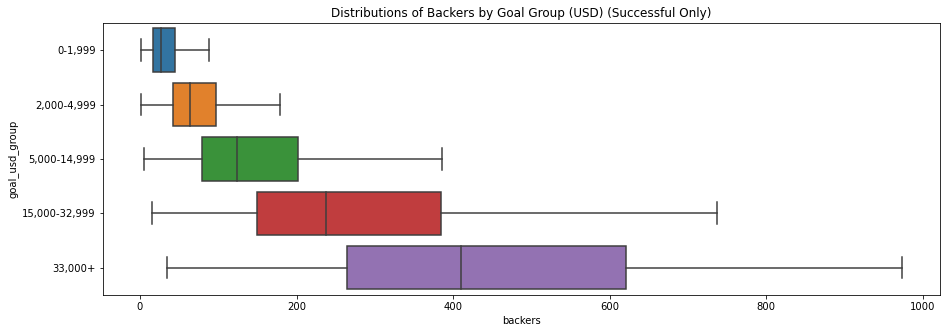

In [807]:
## boxplots to show the distribution of backers across goal groups (successful only)

plt.figure(figsize = (15,5))
plt.title("Distributions of Backers by Goal Group (USD) (Successful Only)")
sns.boxplot(x = df3_successful["backers"], y = df3_successful["goal_usd_group"], showfliers = False)

# normally distributed, obvious results

<AxesSubplot:title={'center':'Distributions of Backers by Goal (Failed Only)'}, xlabel='backers', ylabel='goal_group'>

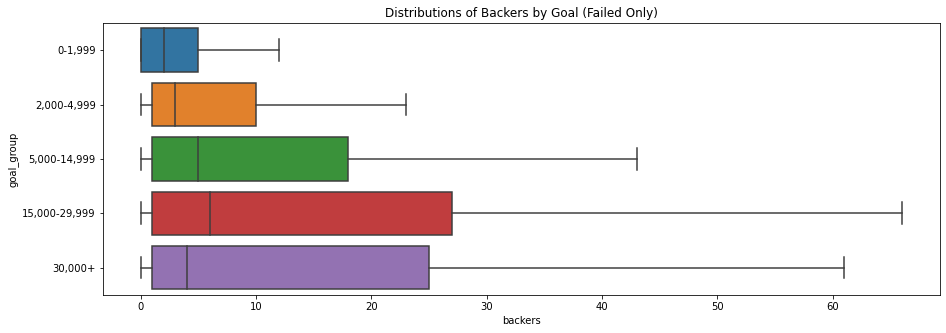

In [808]:
## boxplots to show the distribution of backers across goal groups (failed only)

plt.figure(figsize = (15,5))
plt.title("Distributions of Backers by Goal (Failed Only)")
sns.boxplot(x = df3_failed["backers"], y = df3_failed["goal_group"], showfliers = False)

# not normally distributed, high skew across all categories

<AxesSubplot:title={'center':'Distributions of USD Pledged by Campaign Length (Successful Only)'}, xlabel='usd_pledged', ylabel='length_days_group'>

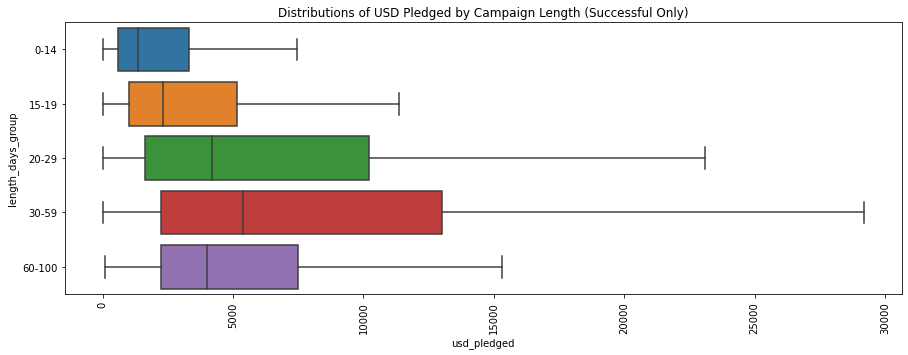

In [809]:
## boxplots to show the distribution of money raised across backers groups (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Distributions of USD Pledged by Campaign Length (Successful Only)")
sns.boxplot(x = df3_successful["usd_pledged"], y = df3_successful["length_days_group"], showfliers = False)

# interesting: highest median for campaigns 30-59 days

<AxesSubplot:title={'center':'Distributions of USD Pledged by Campaign Length (Failed Only)'}, xlabel='usd_pledged', ylabel='length_days_group'>

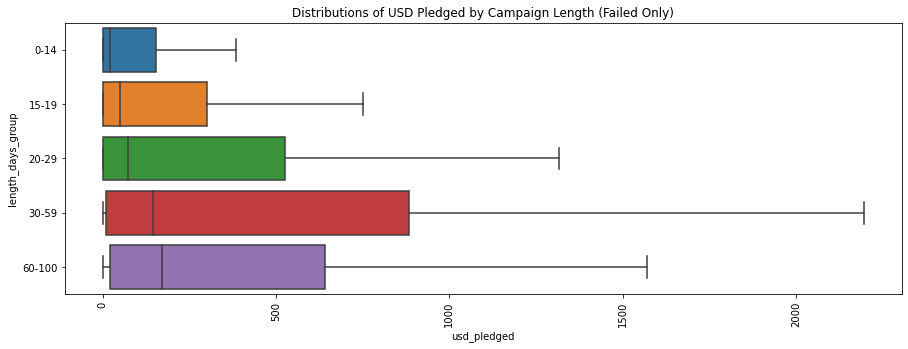

In [810]:
## boxplots to show the distribution of money raised across backers groups (failed only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Distributions of USD Pledged by Campaign Length (Failed Only)")
sns.boxplot(x = df3_failed["usd_pledged"], y = df3_failed["length_days_group"], showfliers = False)

<AxesSubplot:title={'center':'Average USD Pledged by Main Category (Successful Only)'}, xlabel='main_category', ylabel='usd_pledged'>

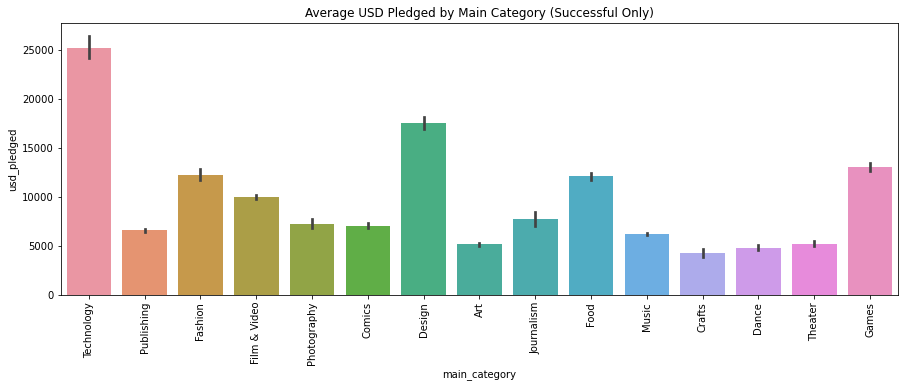

In [811]:
## countplot showing mean usd pledged per main category (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Main Category (Successful Only)")
sns.barplot(x = df3_successful["main_category"], y = df3_successful["usd_pledged"])

In [812]:
df3_successful["usd_pledged"].groupby(df3_successful["main_category"]).mean()

main_category
Art              5124.252426
Comics           7036.204892
Crafts           4259.269941
Dance            4790.832738
Design          17545.266299
Fashion         12239.824699
Film & Video     9916.153692
Food            12049.140989
Games           12979.508552
Journalism       7675.034311
Music            6204.930492
Photography      7218.392008
Publishing       6534.299656
Technology      25197.102086
Theater          5197.463551
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged by Main Category (Failed Only)'}, xlabel='main_category', ylabel='usd_pledged'>

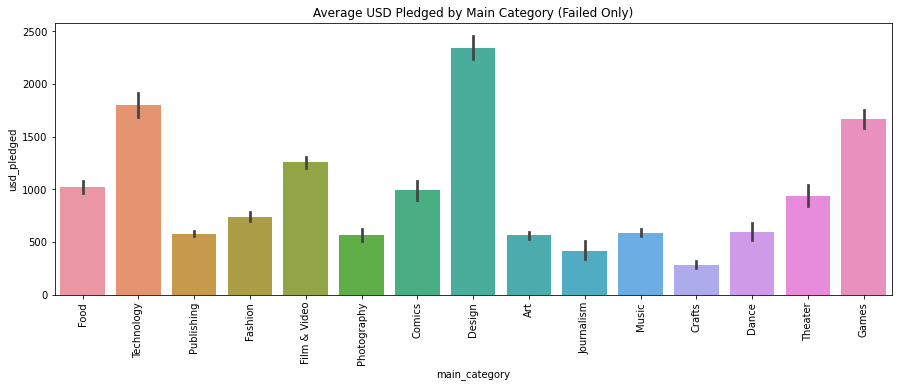

In [813]:
## countplot showing mean usd pledged per main category (failed only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Main Category (Failed Only)")
sns.barplot(x = df3_failed["main_category"], y = df3_failed["usd_pledged"])

<AxesSubplot:title={'center':'Average USD Pledged by Backers Group (Successful Only)'}, xlabel='backers_group', ylabel='usd_pledged'>

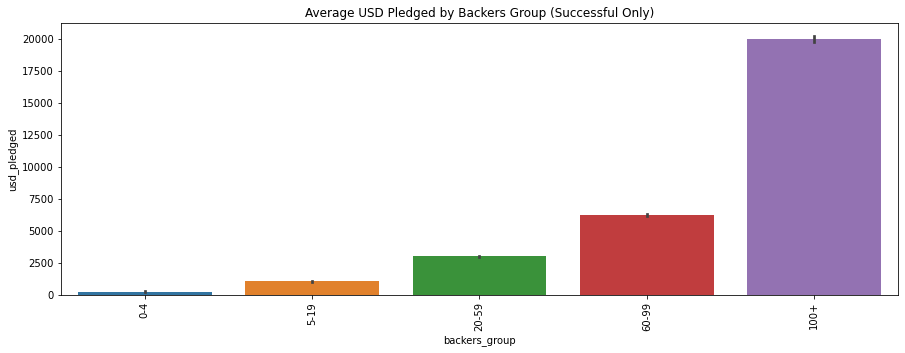

In [814]:
## countplot showing mean usd pledged per main category (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Backers Group (Successful Only)")
sns.barplot(x = df3_successful["backers_group"], y = df3_successful["usd_pledged"])

# obvious results

<AxesSubplot:title={'center':'Average USD Pledged by Backers Group (Failed Only)'}, xlabel='backers_group', ylabel='usd_pledged'>

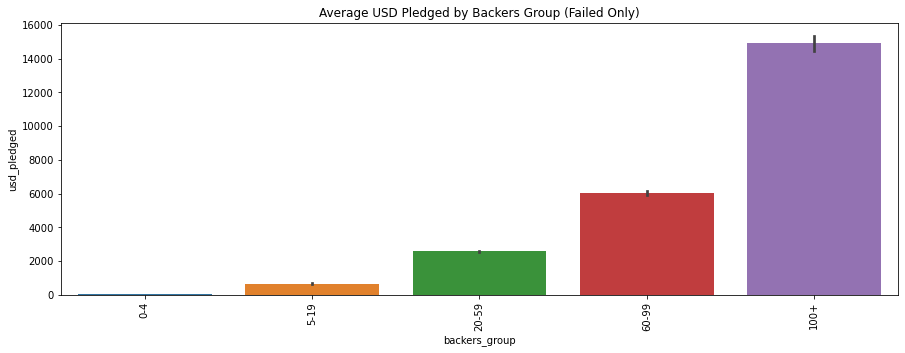

In [815]:
## countplot showing mean usd pledged per main category (failed only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average USD Pledged by Backers Group (Failed Only)")
sns.barplot(x = df3_failed["backers_group"], y = df3_failed["usd_pledged"])

# obvious results (but failed projects still raise more money)

In [816]:
df3["length_days_group"].groupby(df3["length_days_group"]).count()

length_days_group
0-14       14299
15-19      10178
20-29     153286
30-59      89387
60-100      1506
Name: length_days_group, dtype: int64

In [817]:
df3_successful["usd_pledged"].groupby(df3_successful["length_days_group"]).median()

length_days_group
0-14      1345.000000
15-19     2307.000000
20-29     4210.000000
30-59     5366.529201
60-100    4000.000000
Name: usd_pledged, dtype: float64

In [818]:
pd.crosstab(df3_successful["length_days_group"], df3_successful["goal_usd_group"], margins = True)

goal_usd_group,"0-1,999","2,000-4,999","5,000-14,999","15,000-32,999","33,000+",All
length_days_group,,,,,,
0-14,5121,1394,594,70,18,7197
15-19,2902,1499,791,139,24,5355
20-29,20895,16929,15002,4722,1635,59183
30-59,9222,9527,9501,3684,1619,33553
60-100,206,299,161,24,7,697
All,38346,29648,26049,8639,3303,105985


In [819]:
pd.crosstab(df3_successful["goal_usd_group"], df3_successful["backers_group"], margins = True)

backers_group,0-4,5-19,20-59,60-99,100+,All
goal_usd_group,,,,,,
"0-1,999",1662,12024,18746,3163,2751,38346
"2,000-4,999",3,1270,12451,8941,6983,29648
"5,000-14,999",1,114,3569,6090,16275,26049
"15,000-32,999",0,4,161,718,7756,8639
"33,000+",0,0,5,36,3262,3303
All,1666,13412,34932,18948,37027,105985


In [820]:
pd.crosstab(df3_successful["length_days_group"], df3_successful["backers_group"], margins = True)

backers_group,0-4,5-19,20-59,60-99,100+,All
length_days_group,,,,,,
0-14,361,2174,2850,810,1002,7197
15-19,121,1091,2211,883,1049,5355
20-29,878,6902,19385,10987,21031,59183
30-59,302,3179,10161,6135,13776,33553
60-100,4,66,325,133,169,697
All,1666,13412,34932,18948,37027,105985


In [821]:
pd.crosstab(df3_successful["goal_usd_group"], df3_successful["length_days_group"], margins = True)

length_days_group,0-14,15-19,20-29,30-59,60-100,All
goal_usd_group,,,,,,
"0-1,999",5121,2902,20895,9222,206,38346
"2,000-4,999",1394,1499,16929,9527,299,29648
"5,000-14,999",594,791,15002,9501,161,26049
"15,000-32,999",70,139,4722,3684,24,8639
"33,000+",18,24,1635,1619,7,3303
All,7197,5355,59183,33553,697,105985


<AxesSubplot:title={'center':'Average Goal (USD) by Backers Group (Successful Only)'}, xlabel='backers_group', ylabel='goal_usd'>

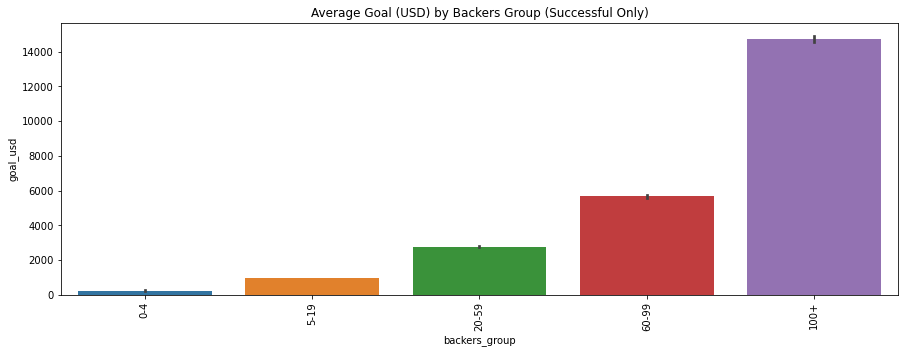

In [822]:
## countplot showing mean goal (USD) per main category (successful only)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Goal (USD) by Backers Group (Successful Only)")
sns.barplot(x = df3_successful["backers_group"], y = df3_successful["goal_usd"])

# Corresponds with info above, where each mean falls within the range listed above

In [823]:
pd.crosstab(df3_failed["goal_group"], df3_failed["pct_funded_group"], margins = True)


# 199/129720 = 0.15% of failed projects ALMOST meet goal (90-99%) - which ones are these?

pct_funded_group,0-49,50-89,90-99,100-109,All
goal_group,,,,,
"0-1,999",35196,1620,35,0,36851
"2,000-4,999",35797,1153,21,1,36972
"5,000-14,999",41107,1313,40,2,42462
"15,000-29,999",20876,629,20,1,21526
"30,000+",24382,456,22,0,24860
All,157358,5171,138,4,162671


In [824]:
df3_failed["goal_usd"].groupby(df3_failed["pct_funded_group"]).mean()

# 0.15% of failed projects ALMOST meet goal (90-99%)
## average goal of these projects is $14,049

pct_funded_group
0-49       20042.305293
50-89      12302.272894
90-99      17318.875713
100-109    10500.000000
110+                NaN
Name: goal_usd, dtype: float64

In [825]:
df3_failed["length_days"].groupby(df3_failed["pct_funded_group"]).mean()

# 0.15% of failed projects ALMOST meet goal (90-99%)
## average length of these projects is 33 days

pct_funded_group
0-49       34.531082
50-89      32.521176
90-99      32.333333
100-109    47.000000
110+             NaN
Name: length_days, dtype: float64

In [826]:
df3_failed["backers"].groupby(df3_failed["pct_funded_group"]).mean()

# 0.15% of failed projects ALMOST meet goal (90-99%)
## average backers of these projects is 102

pct_funded_group
0-49        13.105003
50-89       84.102495
90-99      131.528986
100-109    108.750000
110+              NaN
Name: backers, dtype: float64

In [827]:
## focus on campaign length

<AxesSubplot:title={'center':'Success by Campaign Length'}, xlabel='length_days_group', ylabel='count'>

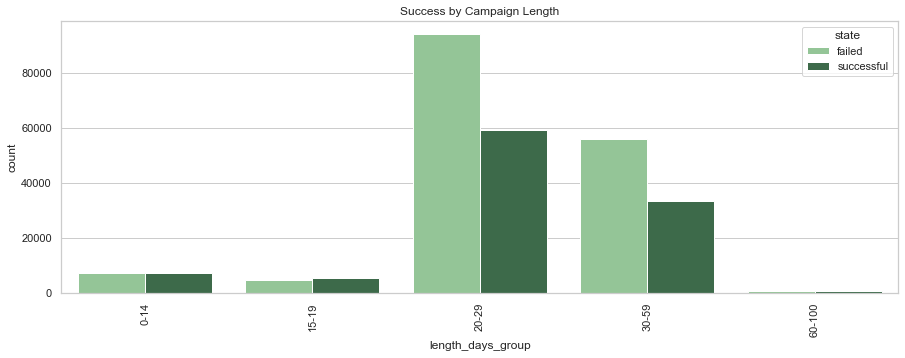

In [1168]:
# success by campaign length and goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Campaign Length")
pal = sns.color_palette("Greens_d")
sns.countplot(x=df3["length_days_group"], hue = df3["state"], palette=np.array(pal[::4]))



<AxesSubplot:title={'center':'Success by Campaign Length and USD Pledged'}, xlabel='length_days_group', ylabel='usd_pledged'>

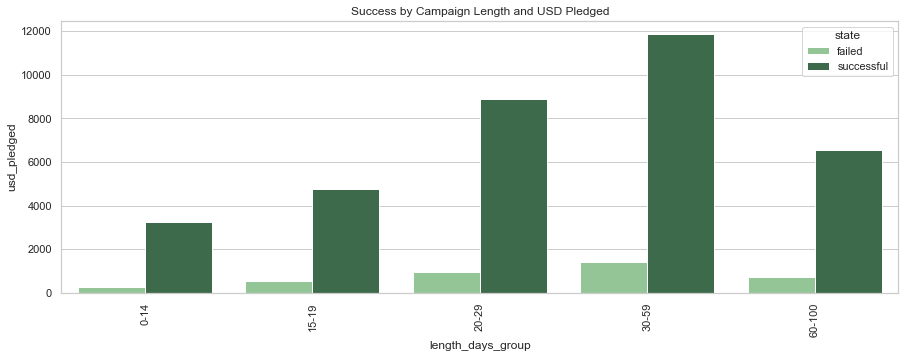

In [1208]:
# sucess by campaign length and goal (USD)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Campaign Length and USD Pledged")
pal = sns.color_palette("Greens_d")
sns.barplot(x=df3["length_days_group"], y = df3["usd_pledged"], hue = df3["state"], ci = None, palette=np.array(pal[::4]))

<AxesSubplot:title={'center':'Success by Campaign Length and Goal (USD)'}, xlabel='length_days_group', ylabel='goal_usd'>

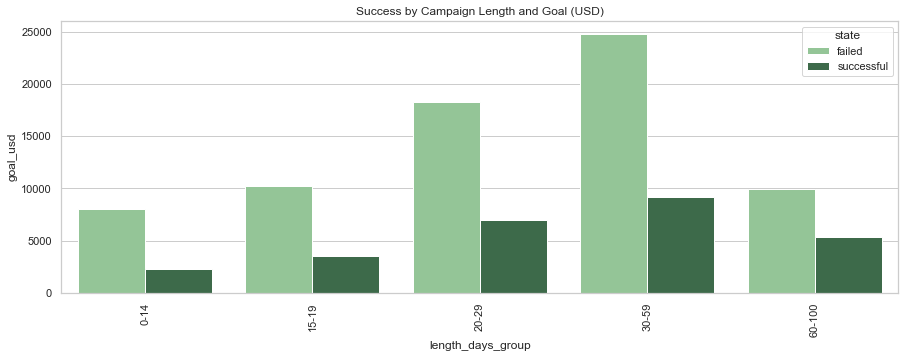

In [1169]:
# sucess by campaign length and goal (USD)

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Campaign Length and Goal (USD)")
pal = sns.color_palette("Greens_d")
sns.barplot(x=df3["length_days_group"], y = df3["goal_usd"], hue = df3["state"], ci = None, palette=np.array(pal[::4]))


In [1206]:
df3["length_days"].groupby(df3["state"]).mean()

state
failed        34.465633
successful    31.554682
Name: length_days, dtype: float64

<AxesSubplot:title={'center':'Success by Campaign Length and Goal'}, xlabel='length_days_group', ylabel='usd_pledged'>

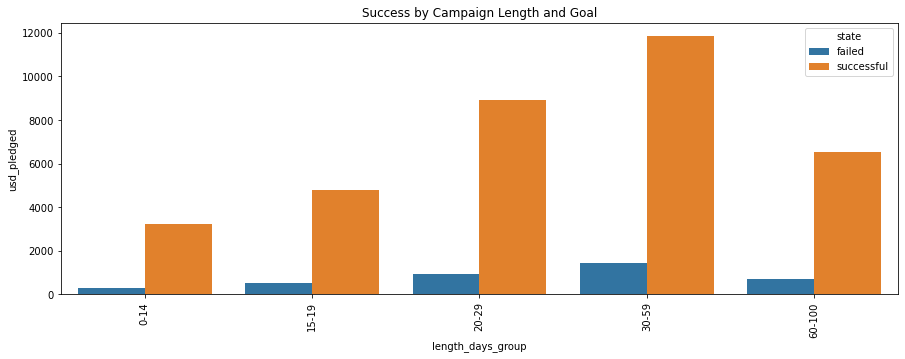

In [1139]:
# sucess by campaign length and goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Campaign Length and Goal")
sns.barplot(x=df3["length_days_group"], y = df3["usd_pledged"], hue = df3["state"], ci = None)

<AxesSubplot:title={'center':'USD Pledged by Main Category'}, xlabel='main_category', ylabel='usd_pledged'>

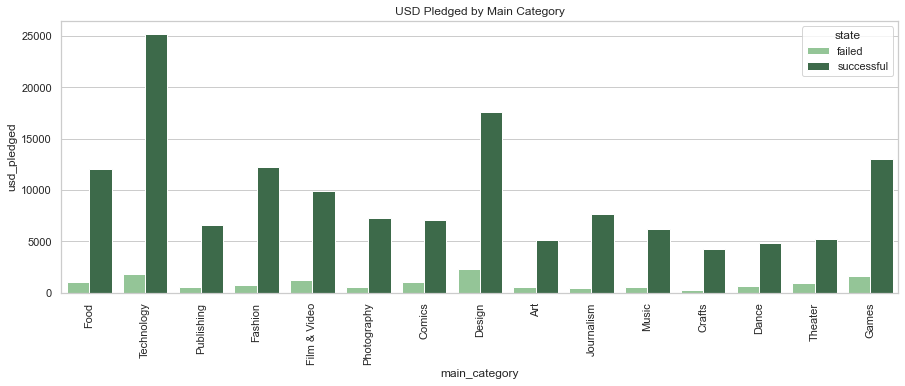

In [1167]:
# sucess by campaign length and goal per main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category")
pal = sns.color_palette("Greens_d")
sns.barplot(x=df3["main_category"], y = df3["usd_pledged"], hue = df3["state"], ci = None, palette=np.array(pal[::4]))

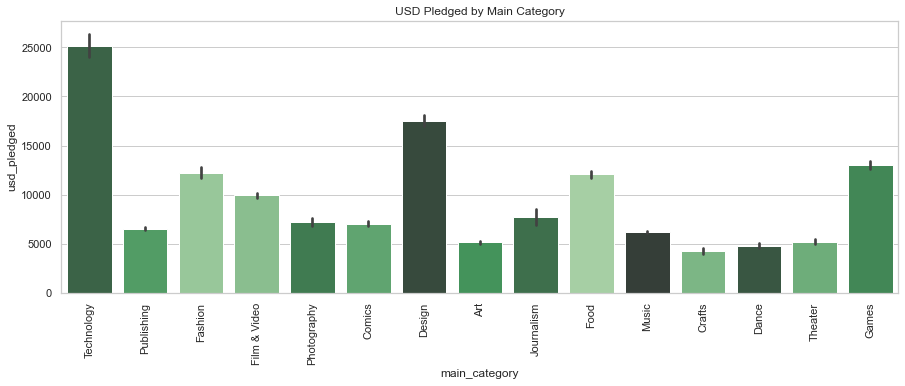

In [1176]:
# sucess by campaign length and goal per main category

import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category")

data = df3_successful.groupby("main_category").size()   # data underlying bar plot in question

pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638
sns.barplot(x=df3_successful["main_category"], y=df3_successful["usd_pledged"], palette=np.array(pal[::1])[rank])

plt.show()


<AxesSubplot:title={'center':'USD Pledged by Main Category and Length (Successful Only)'}, xlabel='main_category', ylabel='usd_pledged'>

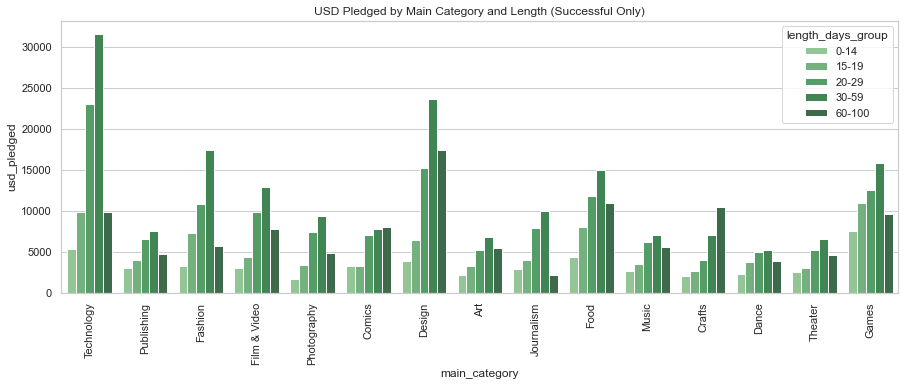

In [1195]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Length (Successful Only)")
pal = sns.color_palette("Greens_d")

sns.barplot(x=df3_successful["main_category"], y=df3_successful["usd_pledged"], hue = df3_successful["length_days_group"], ci = None, palette=np.array(pal[::1]))


<AxesSubplot:title={'center':'Success by Category'}, xlabel='main_category', ylabel='count'>

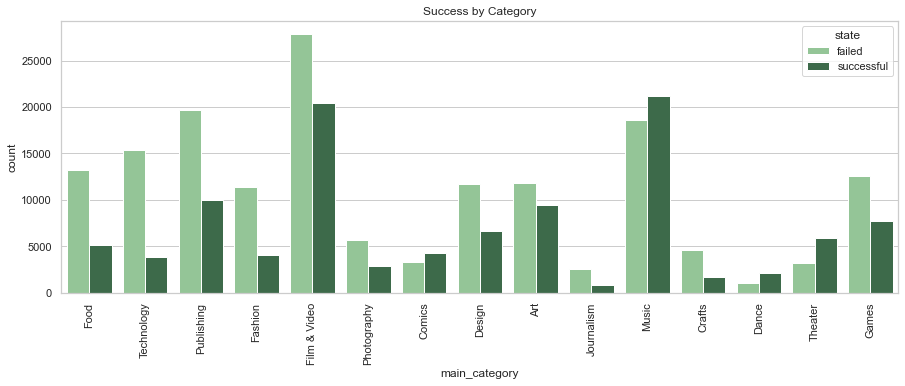

In [1198]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Category")
pal = sns.color_palette("Greens_d")

sns.countplot(x=df3["main_category"], hue = df3["state"], palette=np.array(pal[::4]))


In [1200]:
pd.crosstab(df3["main_category"], df3["state"], margins = True)

state,failed,successful,All
main_category,,,
Art,11817,9453,21270
Comics,3332,4257,7589
Crafts,4603,1644,6247
Dance,1070,2078,3148
Design,11698,6653,18351
Fashion,11368,4089,15457
Film & Video,27893,20479,48372
Food,13250,5082,18332
Games,12617,7737,20354


In [831]:
df3_length_days_1.corr()

# very weak correlation between length and goal for campaigns of 0-14 days = -.025

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,state_binary
length_days,1.000000,0.018659,0.067669,0.064476,0.071029,0.022963,-0.020372,0.063134,0.021938
goal,0.018659,1.000000,0.086195,0.014166,0.068215,0.891241,-0.030511,0.023898,-0.166331
pledged,0.067669,0.086195,1.000000,0.664334,0.837849,0.072255,0.071584,0.299487,0.283435
backers,0.064476,0.014166,0.664334,1.000000,0.712059,0.016044,0.117576,0.095619,0.360000
usd_pledged,0.071029,0.068215,0.837849,0.712059,1.000000,0.079959,0.077627,0.375779,0.310379
goal_usd,0.022963,0.891241,0.072255,0.016044,0.079959,1.000000,-0.034268,0.029625,-0.186918
pct_funded,-0.020372,-0.030511,0.071584,0.117576,0.077627,-0.034268,1.000000,0.016556,0.125284
avg_pledge_per_backer,0.063134,0.023898,0.299487,0.095619,0.375779,0.029625,0.016556,1.000000,0.337592
state_binary,0.021938,-0.166331,0.283435,0.360000,0.310379,-0.186918,0.125284,0.337592,1.000000


In [832]:
df3_length_days_2.corr()

# better correlation (but still weak) between length and goal for campaigns of 15-29 days = 0.045

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,state_binary
length_days,1.000000,0.042928,-0.027579,-0.051514,-0.039766,0.044910,-0.031372,-0.042938,-0.103831
goal,0.042928,1.000000,0.181554,0.056534,0.122032,0.872890,-0.043909,0.039388,-0.176861
pledged,-0.027579,0.181554,1.000000,0.690924,0.834495,0.130650,0.111580,0.296402,0.290075
backers,-0.051514,0.056534,0.690924,1.000000,0.762219,0.064940,0.226535,0.096304,0.376672
usd_pledged,-0.039766,0.122032,0.834495,0.762219,1.000000,0.138077,0.133596,0.380155,0.327436
goal_usd,0.044910,0.872890,0.130650,0.064940,0.138077,1.000000,-0.048776,0.043113,-0.196646
pct_funded,-0.031372,-0.043909,0.111580,0.226535,0.133596,-0.048776,1.000000,0.031570,0.173914
avg_pledge_per_backer,-0.042938,0.039388,0.296402,0.096304,0.380155,0.043113,0.031570,1.000000,0.337933
state_binary,-0.103831,-0.176861,0.290075,0.376672,0.327436,-0.196646,0.173914,0.337933,1.000000


In [833]:
df3_length_days_3.corr()

# better correlation (but still weak) between length and goal for campaigns of 30-59 days = 0.077

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,state_binary
length_days,1.000000,0.054791,-0.011191,-0.030474,-0.010784,0.065222,-0.024724,-0.035136,-0.134133
goal,0.054791,1.000000,0.167332,0.049850,0.124782,0.859369,-0.031867,0.077512,-0.172067
pledged,-0.011191,0.167332,1.000000,0.724593,0.898043,0.152168,0.061518,0.387807,0.374291
backers,-0.030474,0.049850,0.724593,1.000000,0.744698,0.063725,0.099454,0.167168,0.465087
usd_pledged,-0.010784,0.124782,0.898043,0.744698,1.000000,0.154592,0.062751,0.441700,0.381279
goal_usd,0.065222,0.859369,0.152168,0.063725,0.154592,1.000000,-0.036774,0.093622,-0.197607
pct_funded,-0.024724,-0.031867,0.061518,0.099454,0.062751,-0.036774,1.000000,0.021909,0.129856
avg_pledge_per_backer,-0.035136,0.077512,0.387807,0.167168,0.441700,0.093622,0.021909,1.000000,0.325178
state_binary,-0.134133,-0.172067,0.374291,0.465087,0.381279,-0.197607,0.129856,0.325178,1.000000


In [834]:
df3_length_days_4.corr()

# weaker correlation between length and goal for campaigns of 60-100 days = 0.019

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,state_binary
length_days,1.000000,0.064848,-0.134210,-0.189714,-0.132125,0.072191,-0.031175,-0.119983,-0.217329
goal,0.064848,1.000000,0.157932,0.052735,0.126457,0.861450,-0.035673,0.085094,-0.188686
pledged,-0.134210,0.157932,1.000000,0.743446,0.918254,0.155741,0.081301,0.395237,0.376874
backers,-0.189714,0.052735,0.743446,1.000000,0.753632,0.069122,0.110103,0.171277,0.470693
usd_pledged,-0.132125,0.126457,0.918254,0.753632,1.000000,0.159627,0.074956,0.440538,0.378053
goal_usd,0.072191,0.861450,0.155741,0.069122,0.159627,1.000000,-0.041310,0.106815,-0.217796
pct_funded,-0.031175,-0.035673,0.081301,0.110103,0.074956,-0.041310,1.000000,0.027165,0.139343
avg_pledge_per_backer,-0.119983,0.085094,0.395237,0.171277,0.440538,0.106815,0.027165,1.000000,0.310011
state_binary,-0.217329,-0.188686,0.376874,0.470693,0.378053,-0.217796,0.139343,0.310011,1.000000


<AxesSubplot:title={'center':'Success of Campaigns 0-14 Days by Main Category'}, xlabel='main_category', ylabel='count'>

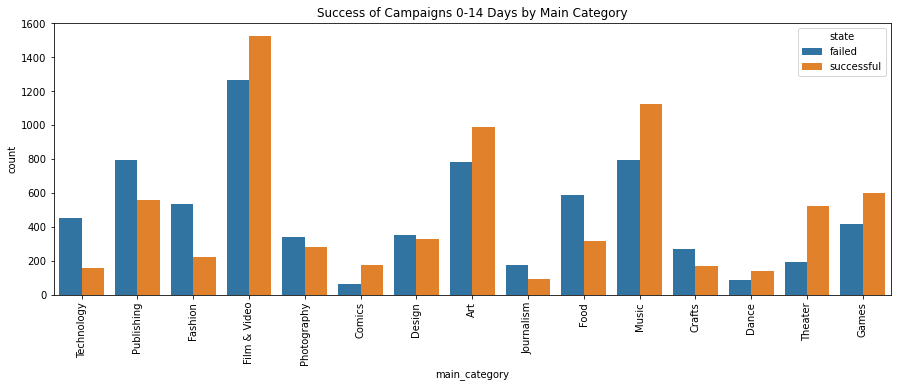

In [835]:
# sucess by main category within 0-14 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 0-14 Days by Main Category")
sns.countplot(x=df3_length_days_1["main_category"], hue = df3_length_days_1["state"])

#short campaigns more successful in film&video, art, music, theater, games

<AxesSubplot:title={'center':'Success of Campaigns 15-19 Days by Main Category'}, xlabel='main_category', ylabel='count'>

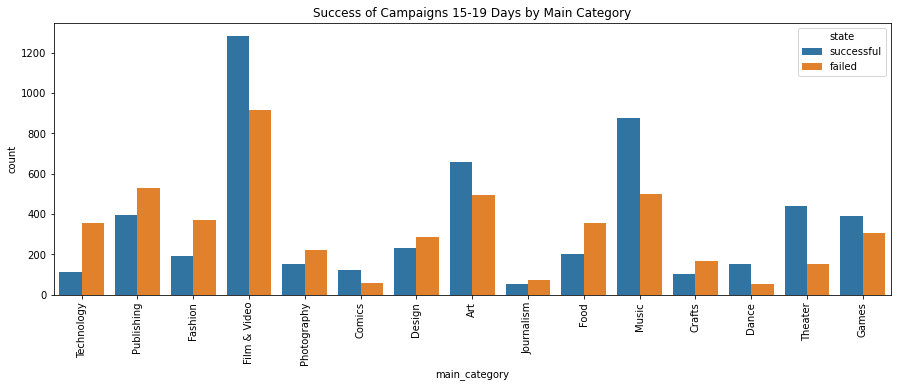

In [836]:
# sucess by main category within 15-19 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 15-19 Days by Main Category")
sns.countplot(x=df3_length_days_2["main_category"], hue = df3_length_days_2["state"])

#medium-length campaigns more successful in comics, music, dance, theater

<AxesSubplot:title={'center':'Success of Campaigns 20-29 Days by Main Category'}, xlabel='main_category', ylabel='count'>

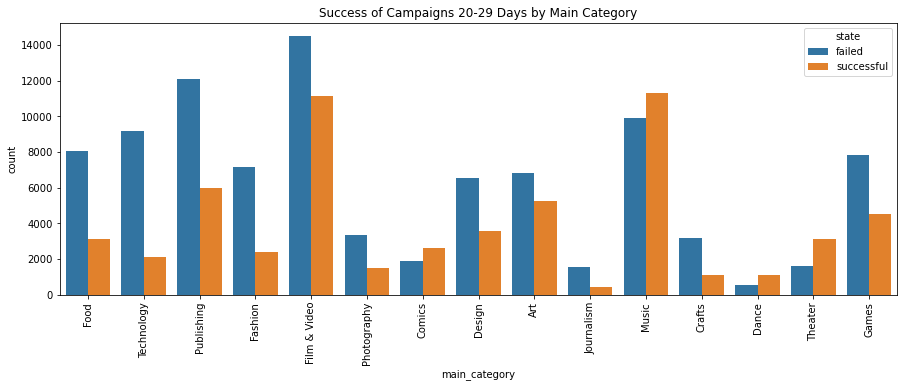

In [837]:
# sucess by main category within 30-59 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 20-29 Days by Main Category")
sns.countplot(x=df3_length_days_3["main_category"], hue = df3_length_days_3["state"])

#short campaigns more successful in music, dance, theater

<AxesSubplot:title={'center':'Success of Campaigns 30-59 Days by Main Category'}, xlabel='main_category', ylabel='count'>

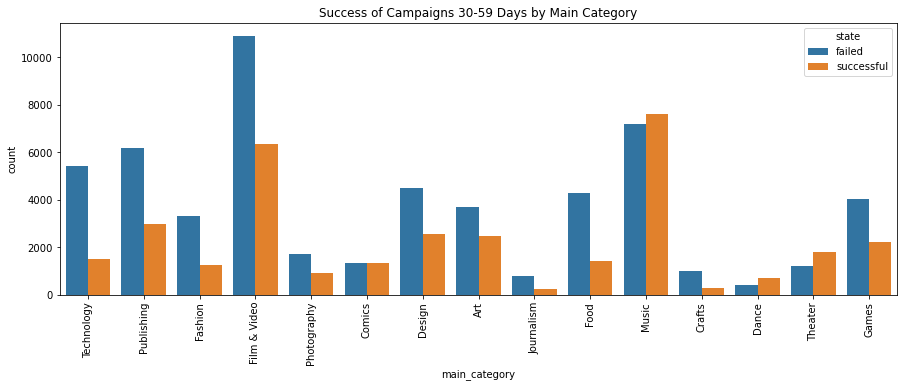

In [838]:
# sucess by main category 30-59 days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 30-59 Days by Main Category")
sns.countplot(x=df3_length_days_4["main_category"], hue = df3_length_days_4["state"])

#short campaigns more successful in art, music, dance, and theater

<AxesSubplot:title={'center':'Success of Campaigns 60+ Days by Main Category'}, xlabel='main_category', ylabel='count'>

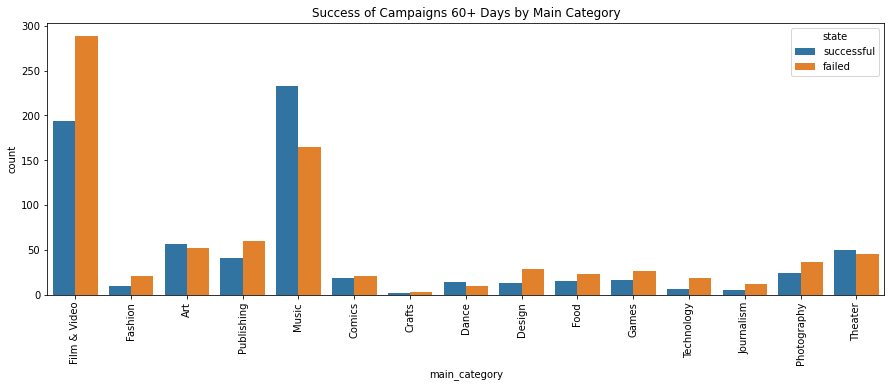

In [840]:
# sucess by main category 60+ days

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success of Campaigns 60+ Days by Main Category")
sns.countplot(x=df3_length_days_5["main_category"], hue = df3_length_days_5["state"])

#short campaigns more successful in art, music, dance, and theater

In [841]:
df3.corr()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,state_binary
length_days,1.000000,0.110749,0.013800,-0.015619,0.016233,0.127154,-0.026290,0.025485,-0.121663
goal,0.110749,1.000000,0.169346,0.057306,0.132787,0.862793,-0.033278,0.085514,-0.180827
pledged,0.013800,0.169346,1.000000,0.729988,0.906914,0.160969,0.062951,0.387404,0.356129
backers,-0.015619,0.057306,0.729988,1.000000,0.745969,0.072783,0.099662,0.168497,0.450570
usd_pledged,0.016233,0.132787,0.906914,0.745969,1.000000,0.164514,0.061630,0.437219,0.360801
goal_usd,0.127154,0.862793,0.160969,0.072783,0.164514,1.000000,-0.038393,0.104227,-0.207745
pct_funded,-0.026290,-0.033278,0.062951,0.099662,0.061630,-0.038393,1.000000,0.020674,0.131116
avg_pledge_per_backer,0.025485,0.085514,0.387404,0.168497,0.437219,0.104227,0.020674,1.000000,0.314149
state_binary,-0.121663,-0.180827,0.356129,0.450570,0.360801,-0.207745,0.131116,0.314149,1.000000


In [966]:
df3_successful.corr()

,length_days,goal,pledged,backers,usd_pledged,goal_usd,pct_funded,avg_pledge_per_backer,state_binary
length_days,1.000000,0.115090,0.102461,0.075354,0.107102,0.119297,-0.016762,0.112234,NaN
goal,0.115090,1.000000,0.860486,0.544862,0.763457,0.934905,-0.038378,0.380299,NaN
pledged,0.102461,0.860486,1.000000,0.679836,0.892706,0.806265,0.016402,0.345442,NaN
backers,0.075354,0.544862,0.679836,1.000000,0.695973,0.580880,0.045938,-0.025316,NaN
usd_pledged,0.107102,0.763457,0.892706,0.695973,1.000000,0.821644,0.014186,0.416935,NaN
goal_usd,0.119297,0.934905,0.806265,0.580880,0.821644,1.000000,-0.039939,0.406076,NaN
pct_funded,-0.016762,-0.038378,0.016402,0.045938,0.014186,-0.039939,1.000000,-0.037810,NaN
avg_pledge_per_backer,0.112234,0.380299,0.345442,-0.025316,0.416935,0.406076,-0.037810,1.000000,NaN
state_binary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df3_failed.corr()

<AxesSubplot:title={'center':'Average Number of Backers by Main Category'}, xlabel='main_category', ylabel='backers'>

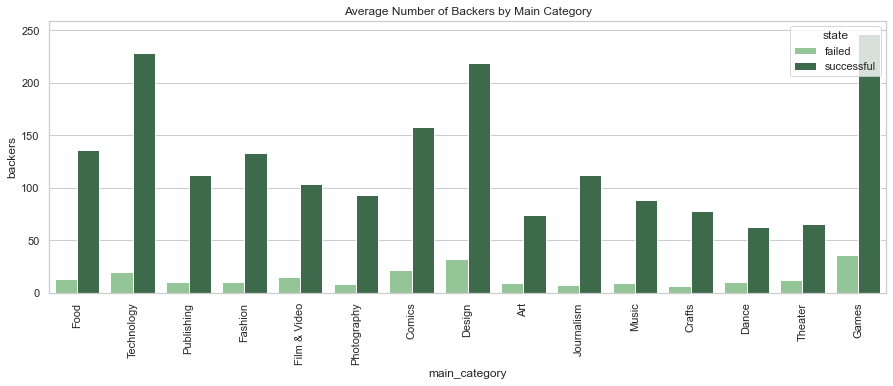

In [1201]:
# average number of backers by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Number of Backers by Main Category")
pal = sns.color_palette("Greens_d")
sns.barplot(data = df3, x="main_category", y= "backers", hue = "state", palette=np.array(pal[::4]), ci = None)



In [1137]:
df3_successful["backers"].groupby(df3_successful["main_category"]).mean()

main_category
Art              73.752036
Comics          158.128729
Crafts           77.518248
Dance            62.109240
Design          218.915226
Fashion         132.937393
Film & Video    103.075883
Food            136.117670
Games           246.535479
Journalism      112.200730
Music            87.991207
Photography      93.354565
Publishing      111.764529
Technology      227.883475
Theater          65.320218
Name: backers, dtype: float64

<AxesSubplot:title={'center':'Average Pledge per Backer by Main Category'}, xlabel='main_category', ylabel='avg_pledge_per_backer'>

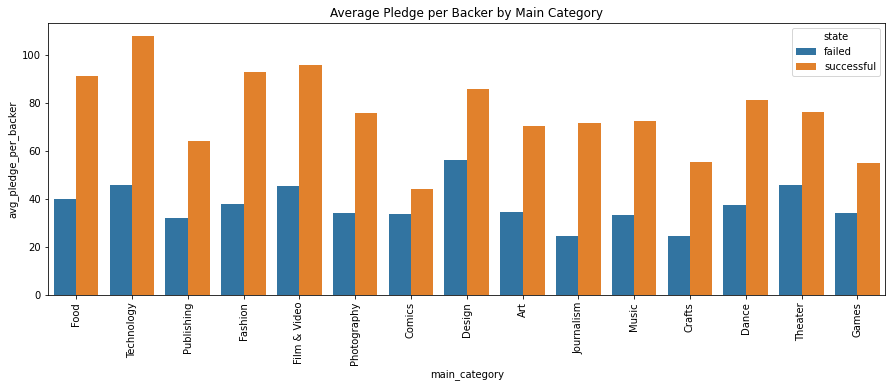

In [1136]:
# average number of backers by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Average Pledge per Backer by Main Category")
sns.barplot(data = df3, x="main_category", y= "avg_pledge_per_backer", hue = "state", ci = None)

# once again, comics stand out

In [1138]:
df3_successful["avg_pledge_per_backer"].groupby(df3_successful["main_category"]).mean()

main_category
Art              70.483483
Comics           44.145817
Crafts           55.253798
Dance            81.138807
Design           85.861462
Fashion          93.099330
Film & Video     95.848189
Food             91.189406
Games            54.715284
Journalism       71.484485
Music            72.624896
Photography      75.575608
Publishing       64.133574
Technology      108.067241
Theater          76.095415
Name: avg_pledge_per_backer, dtype: float64

In [1207]:
df3_successful["usd_pledged"].groupby(df3_successful["main_category"]).mean()

main_category
Art              5124.252426
Comics           7036.204892
Crafts           4259.269941
Dance            4790.832738
Design          17545.266299
Fashion         12239.824699
Film & Video     9916.153692
Food            12049.140989
Games           12979.508552
Journalism       7675.034311
Music            6204.930492
Photography      7218.392008
Publishing       6534.299656
Technology      25197.102086
Theater          5197.463551
Name: usd_pledged, dtype: float64

<AxesSubplot:title={'center':'Success by Length'}, xlabel='goal_usd_group', ylabel='count'>

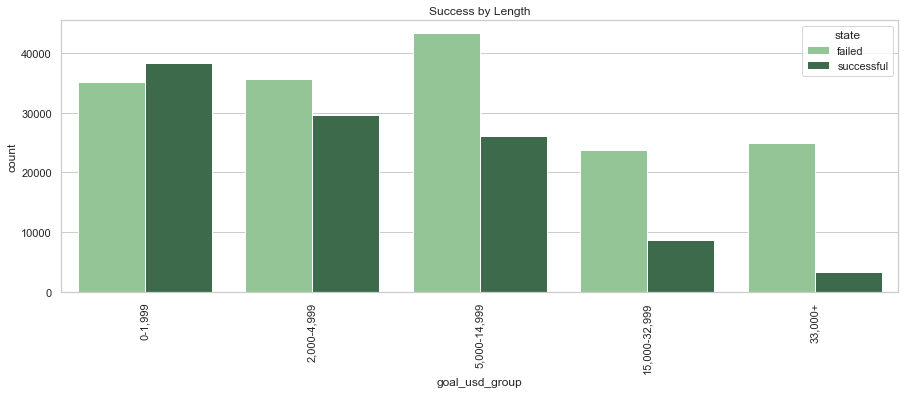

In [1203]:
# success rate 

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Success by Length")
pal = sns.color_palette("Greens_d")
sns.countplot(data = df3, x="goal_usd_group", hue = "state", palette=np.array(pal[::4]))



In [1204]:
df3["goal"].groupby(df3["state"]).mean()

state
failed        19916.561848
successful     7128.324098
Name: goal, dtype: float64

# Creating Datasets of Sub-Groups (Main Categories)

In [1087]:
# for sub-group analysis creating a dataset with main category = food only

df3_food = df3.copy()

In [1088]:
df3_food["Food Main Category"] = np.where(df3["main_category"]=="Food", "Y", "N")
df3_food.head()

,main_category,category,country,currency,launched,length_days,goal,pledged,backers,state,...,pct_funded,avg_pledge_per_backer,backers_group,usd_pledged_group,pct_funded_group,length_days_group,goal_group,goal_usd_group,state_binary,Food Main Category
0,Food,Cookbooks,US,USD,2014-08-09 03:16:02,29,13730.0,3984.0,46,failed,...,29.016752,86.608696,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","5,000-14,999",0,Y
1,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,35,75000.0,7386.0,31,failed,...,9.848000,50.380130,20-59,"1,000-4,999",0-49,30-59,"30,000+","33,000+",0,N
2,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,30,15000.0,3834.0,46,failed,...,25.560000,90.269610,20-59,"1,000-4,999",0-49,20-29,"5,000-14,999","15,000-32,999",0,N
3,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,30,20000.0,18.0,6,failed,...,0.090000,3.239255,5-19,0-99,0-49,20-29,"15,000-29,999","15,000-32,999",0,N
4,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,40,20000.0,2598.0,29,failed,...,12.990000,100.278503,20-59,"1,000-4,999",0-49,30-59,"15,000-29,999","15,000-32,999",0,N


In [1089]:
df3_food.drop(df3_food.loc[df3_food["Food Main Category"]=="N"].index, inplace = True)

In [1090]:
df3_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18332 entries, 0 to 260615
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          18332 non-null  object        
 1   category               18332 non-null  object        
 2   country                18332 non-null  object        
 3   currency               18332 non-null  object        
 4   launched               18332 non-null  datetime64[ns]
 5   length_days            18332 non-null  int64         
 6   goal                   18332 non-null  float64       
 7   pledged                18332 non-null  float64       
 8   backers                18332 non-null  int64         
 9   state                  18332 non-null  object        
 10  usd_pledged            18332 non-null  float64       
 11  goal_usd               18332 non-null  float64       
 12  pct_funded             18332 non-null  float64       
 13  

In [1091]:
# for sub-group analysis creating a dataset with main category = techonology only

df3_tech = df3.copy()
df3_tech["Tech Main Category"] = np.where(df3["main_category"]=="Technology", "Y", "N")
df3_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1092]:
df3_tech.drop(df3_tech.loc[df3_tech["Tech Main Category"]=="N"].index, inplace = True)
df3_tech.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19278 entries, 1 to 273153
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          19278 non-null  object        
 1   category               19278 non-null  object        
 2   country                19278 non-null  object        
 3   currency               19278 non-null  object        
 4   launched               19278 non-null  datetime64[ns]
 5   length_days            19278 non-null  int64         
 6   goal                   19278 non-null  float64       
 7   pledged                19278 non-null  float64       
 8   backers                19278 non-null  int64         
 9   state                  19278 non-null  object        
 10  usd_pledged            19278 non-null  float64       
 11  goal_usd               19278 non-null  float64       
 12  pct_funded             19278 non-null  float64       
 13  

In [1278]:
# for sub-group analysis creating a dataset with main category = techonology, subcategory = Camera Robot Sound Wear

df3_tech_focus = df3_tech.copy()
df3_tech_focus["Tech Main Camera Robot Sound Wear"] = np.where(df3_tech_focus["category"]==("Camera Equipment" or "Robots" or "Sound" or "Wearables"), "Y", "N")
df3_tech_focus.drop(df3_tech_focus.loc[df3_tech_focus["Tech Main Camera Robot Sound Wear"]=="N"].index, inplace = True)
df3_tech_focus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 24254 to 24503
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   main_category                      186 non-null    object        
 1   category                           186 non-null    object        
 2   country                            186 non-null    object        
 3   currency                           186 non-null    object        
 4   launched                           186 non-null    datetime64[ns]
 5   length_days                        186 non-null    int64         
 6   goal                               186 non-null    float64       
 7   pledged                            186 non-null    float64       
 8   backers                            186 non-null    int64         
 9   state                              186 non-null    object        
 10  usd_pledged                     

In [1279]:
mod12 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_tech_focus).fit()

mod12.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.405415
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                  186
Model:                          Logit   Df Residuals:                      183
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.4102
Time:                        16:39:14   Log-Likelihood:                -75.407
converged:                       True   LL-Null:                       -127.85
Covariance Type:            nonrobust   LLR p-value:                 1.680e-23
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0298      0.008     -3.772      0.000      -0.045      -0.014
goal_usd    -5.351e-05   1.21e-05     -4.407      0.000   -7.73e-05   -2.97e-05
backers         0.0198      0.003      6.032      0.000       0.013       0.026
===============================================================================
"""

In [1280]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_tech_focus = pd.DataFrame(np.exp(mod12.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_tech_focus["pvalue"] = mod12.pvalues

## create a variable to quickly determine sig

df3_tech_focus["Sig"] = np.where(df3_tech_focus["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_tech_focus

,OR,pvalue,Sig
length_days,0.970633,1.620588e-04,Sig
goal_usd,0.999946,1.046399e-05,Sig
backers,1.019956,1.622698e-09,Sig


In [1093]:
# for sub-group analysis creating a dataset with main category = publishing only

df3_pub = df3.copy()
df3_pub["Publishing Main Category"] = np.where(df3_pub["main_category"]=="Publishing", "Y", "N")
df3_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   main_category             268656 non-null  object        
 1   category                  268656 non-null  object        
 2   country                   268656 non-null  object        
 3   currency                  268656 non-null  object        
 4   launched                  268656 non-null  datetime64[ns]
 5   length_days               268656 non-null  int64         
 6   goal                      268656 non-null  float64       
 7   pledged                   268656 non-null  float64       
 8   backers                   268656 non-null  int64         
 9   state                     268656 non-null  object        
 10  usd_pledged               268656 non-null  float64       
 11  goal_usd                  268656 non-null  float64       
 12  pc

In [1094]:
df3_pub.drop(df3_pub.loc[df3_pub["Publishing Main Category"]=="N"].index, inplace = True)
df3_pub.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29603 entries, 456 to 281855
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   main_category             29603 non-null  object        
 1   category                  29603 non-null  object        
 2   country                   29603 non-null  object        
 3   currency                  29603 non-null  object        
 4   launched                  29603 non-null  datetime64[ns]
 5   length_days               29603 non-null  int64         
 6   goal                      29603 non-null  float64       
 7   pledged                   29603 non-null  float64       
 8   backers                   29603 non-null  int64         
 9   state                     29603 non-null  object        
 10  usd_pledged               29603 non-null  float64       
 11  goal_usd                  29603 non-null  float64       
 12  pct_funded     

In [1095]:
# for sub-group analysis creating a dataset with main category = fashion only

df3_fash = df3.copy()
df3_fash["Fashion Main Category"] = np.where(df3_fash["main_category"]=="Fashion", "Y", "N")
df3_fash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1096]:
df3_fash.drop(df3_fash.loc[df3_fash["Fashion Main Category"]=="N"].index, inplace = True)
df3_fash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15457 entries, 1046 to 212623
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          15457 non-null  object        
 1   category               15457 non-null  object        
 2   country                15457 non-null  object        
 3   currency               15457 non-null  object        
 4   launched               15457 non-null  datetime64[ns]
 5   length_days            15457 non-null  int64         
 6   goal                   15457 non-null  float64       
 7   pledged                15457 non-null  float64       
 8   backers                15457 non-null  int64         
 9   state                  15457 non-null  object        
 10  usd_pledged            15457 non-null  float64       
 11  goal_usd               15457 non-null  float64       
 12  pct_funded             15457 non-null  float64       
 1

In [1097]:
# for sub-group analysis creating a dataset with main category = film & video only

df3_film = df3.copy()
df3_film["Film & Video Main Category"] = np.where(df3_film["main_category"]=="Film & Video", "Y", "N")
df3_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   main_category               268656 non-null  object        
 1   category                    268656 non-null  object        
 2   country                     268656 non-null  object        
 3   currency                    268656 non-null  object        
 4   launched                    268656 non-null  datetime64[ns]
 5   length_days                 268656 non-null  int64         
 6   goal                        268656 non-null  float64       
 7   pledged                     268656 non-null  float64       
 8   backers                     268656 non-null  int64         
 9   state                       268656 non-null  object        
 10  usd_pledged                 268656 non-null  float64       
 11  goal_usd                    268656 non-

In [1098]:
df3_film.drop(df3_film.loc[df3_film["Film & Video Main Category"]=="N"].index, inplace = True)
df3_film.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48372 entries, 2784 to 278356
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   main_category               48372 non-null  object        
 1   category                    48372 non-null  object        
 2   country                     48372 non-null  object        
 3   currency                    48372 non-null  object        
 4   launched                    48372 non-null  datetime64[ns]
 5   length_days                 48372 non-null  int64         
 6   goal                        48372 non-null  float64       
 7   pledged                     48372 non-null  float64       
 8   backers                     48372 non-null  int64         
 9   state                       48372 non-null  object        
 10  usd_pledged                 48372 non-null  float64       
 11  goal_usd                    48372 non-null  float6

In [1099]:
# for sub-group analysis creating a dataset with main category = photography only

df3_photo = df3.copy()
df3_photo["Photography Main Category"] = np.where(df3_photo["main_category"]=="Photography", "Y", "N")
df3_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   main_category              268656 non-null  object        
 1   category                   268656 non-null  object        
 2   country                    268656 non-null  object        
 3   currency                   268656 non-null  object        
 4   launched                   268656 non-null  datetime64[ns]
 5   length_days                268656 non-null  int64         
 6   goal                       268656 non-null  float64       
 7   pledged                    268656 non-null  float64       
 8   backers                    268656 non-null  int64         
 9   state                      268656 non-null  object        
 10  usd_pledged                268656 non-null  float64       
 11  goal_usd                   268656 non-null  float64 

In [1100]:
df3_photo.drop(df3_photo.loc[df3_photo["Photography Main Category"]=="N"].index, inplace = True)
df3_photo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 3279 to 182183
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   main_category              8474 non-null   object        
 1   category                   8474 non-null   object        
 2   country                    8474 non-null   object        
 3   currency                   8474 non-null   object        
 4   launched                   8474 non-null   datetime64[ns]
 5   length_days                8474 non-null   int64         
 6   goal                       8474 non-null   float64       
 7   pledged                    8474 non-null   float64       
 8   backers                    8474 non-null   int64         
 9   state                      8474 non-null   object        
 10  usd_pledged                8474 non-null   float64       
 11  goal_usd                   8474 non-null   float64       
 12  p

In [1101]:
# for sub-group analysis creating a dataset with main category = comics only

df3_comics = df3.copy()
df3_comics["Comics Main Category"] = np.where(df3_comics["main_category"]=="Comics", "Y", "N")
df3_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1102]:
df3_comics.drop(df3_comics.loc[df3_comics["Comics Main Category"]=="N"].index, inplace = True)
df3_comics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7589 entries, 5443 to 273584
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          7589 non-null   object        
 1   category               7589 non-null   object        
 2   country                7589 non-null   object        
 3   currency               7589 non-null   object        
 4   launched               7589 non-null   datetime64[ns]
 5   length_days            7589 non-null   int64         
 6   goal                   7589 non-null   float64       
 7   pledged                7589 non-null   float64       
 8   backers                7589 non-null   int64         
 9   state                  7589 non-null   object        
 10  usd_pledged            7589 non-null   float64       
 11  goal_usd               7589 non-null   float64       
 12  pct_funded             7589 non-null   float64       
 13

In [1103]:
# for sub-group analysis creating a dataset with main category = design only

df3_design = df3.copy()
df3_design["Design Main Category"] = np.where(df3_design["main_category"]=="Design", "Y", "N")
df3_design.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1104]:
df3_design.drop(df3_design.loc[df3_design["Design Main Category"]=="N"].index, inplace = True)
df3_design.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18351 entries, 14594 to 260245
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          18351 non-null  object        
 1   category               18351 non-null  object        
 2   country                18351 non-null  object        
 3   currency               18351 non-null  object        
 4   launched               18351 non-null  datetime64[ns]
 5   length_days            18351 non-null  int64         
 6   goal                   18351 non-null  float64       
 7   pledged                18351 non-null  float64       
 8   backers                18351 non-null  int64         
 9   state                  18351 non-null  object        
 10  usd_pledged            18351 non-null  float64       
 11  goal_usd               18351 non-null  float64       
 12  pct_funded             18351 non-null  float64       
 

In [1105]:
# for sub-group analysis creating a dataset with main category = art only

df3_art = df3.copy()
df3_art["Art Main Category"] = np.where(df3_art["main_category"]=="Art", "Y", "N")
df3_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1106]:
df3_art.drop(df3_art.loc[df3_art["Art Main Category"]=="N"].index, inplace = True)
df3_art.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21270 entries, 15125 to 261057
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          21270 non-null  object        
 1   category               21270 non-null  object        
 2   country                21270 non-null  object        
 3   currency               21270 non-null  object        
 4   launched               21270 non-null  datetime64[ns]
 5   length_days            21270 non-null  int64         
 6   goal                   21270 non-null  float64       
 7   pledged                21270 non-null  float64       
 8   backers                21270 non-null  int64         
 9   state                  21270 non-null  object        
 10  usd_pledged            21270 non-null  float64       
 11  goal_usd               21270 non-null  float64       
 12  pct_funded             21270 non-null  float64       
 

In [1107]:
# for sub-group analysis creating a dataset with main category = journalism only

df3_journ = df3.copy()
df3_journ["Journalism Main Category"] = np.where(df3_journ["main_category"]=="Journalism", "Y", "N")
df3_journ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   main_category             268656 non-null  object        
 1   category                  268656 non-null  object        
 2   country                   268656 non-null  object        
 3   currency                  268656 non-null  object        
 4   launched                  268656 non-null  datetime64[ns]
 5   length_days               268656 non-null  int64         
 6   goal                      268656 non-null  float64       
 7   pledged                   268656 non-null  float64       
 8   backers                   268656 non-null  int64         
 9   state                     268656 non-null  object        
 10  usd_pledged               268656 non-null  float64       
 11  goal_usd                  268656 non-null  float64       
 12  pc

In [1108]:
df3_journ.drop(df3_journ.loc[df3_journ["Journalism Main Category"]=="N"].index, inplace = True)
df3_journ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3415 entries, 23416 to 273155
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   main_category             3415 non-null   object        
 1   category                  3415 non-null   object        
 2   country                   3415 non-null   object        
 3   currency                  3415 non-null   object        
 4   launched                  3415 non-null   datetime64[ns]
 5   length_days               3415 non-null   int64         
 6   goal                      3415 non-null   float64       
 7   pledged                   3415 non-null   float64       
 8   backers                   3415 non-null   int64         
 9   state                     3415 non-null   object        
 10  usd_pledged               3415 non-null   float64       
 11  goal_usd                  3415 non-null   float64       
 12  pct_funded    

In [1109]:
# for sub-group analysis creating a dataset with main category = music only

df3_music = df3.copy()
df3_music["Music Main Category"] = np.where(df3_music["main_category"]=="Music", "Y", "N")
df3_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1110]:
df3_music.drop(df3_music.loc[df3_music["Music Main Category"]=="N"].index, inplace = True)
df3_music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39704 entries, 23856 to 281029
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          39704 non-null  object        
 1   category               39704 non-null  object        
 2   country                39704 non-null  object        
 3   currency               39704 non-null  object        
 4   launched               39704 non-null  datetime64[ns]
 5   length_days            39704 non-null  int64         
 6   goal                   39704 non-null  float64       
 7   pledged                39704 non-null  float64       
 8   backers                39704 non-null  int64         
 9   state                  39704 non-null  object        
 10  usd_pledged            39704 non-null  float64       
 11  goal_usd               39704 non-null  float64       
 12  pct_funded             39704 non-null  float64       
 

In [1111]:
# for sub-group analysis creating a dataset with main category = crafts only

df3_crafts = df3.copy()
df3_crafts["Crafts Main Category"] = np.where(df3_crafts["main_category"]=="Crafts", "Y", "N")
df3_crafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1112]:
df3_crafts.drop(df3_crafts.loc[df3_crafts["Crafts Main Category"]=="N"].index, inplace = True)
df3_crafts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6247 entries, 24505 to 279198
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          6247 non-null   object        
 1   category               6247 non-null   object        
 2   country                6247 non-null   object        
 3   currency               6247 non-null   object        
 4   launched               6247 non-null   datetime64[ns]
 5   length_days            6247 non-null   int64         
 6   goal                   6247 non-null   float64       
 7   pledged                6247 non-null   float64       
 8   backers                6247 non-null   int64         
 9   state                  6247 non-null   object        
 10  usd_pledged            6247 non-null   float64       
 11  goal_usd               6247 non-null   float64       
 12  pct_funded             6247 non-null   float64       
 1

In [1113]:
# for sub-group analysis creating a dataset with main category = dance only

df3_dance = df3.copy()
df3_dance["Dance Main Category"] = np.where(df3_dance["main_category"]=="Dance", "Y", "N")
df3_dance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1114]:
df3_dance.drop(df3_dance.loc[df3_dance["Dance Main Category"]=="N"].index, inplace = True)
df3_dance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3148 entries, 49379 to 279317
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          3148 non-null   object        
 1   category               3148 non-null   object        
 2   country                3148 non-null   object        
 3   currency               3148 non-null   object        
 4   launched               3148 non-null   datetime64[ns]
 5   length_days            3148 non-null   int64         
 6   goal                   3148 non-null   float64       
 7   pledged                3148 non-null   float64       
 8   backers                3148 non-null   int64         
 9   state                  3148 non-null   object        
 10  usd_pledged            3148 non-null   float64       
 11  goal_usd               3148 non-null   float64       
 12  pct_funded             3148 non-null   float64       
 1

In [1115]:
# for sub-group analysis creating a dataset with main category = theater only

df3_thea = df3.copy()
df3_thea["Theater Main Category"] = np.where(df3_thea["main_category"]=="Theater", "Y", "N")
df3_thea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1116]:
df3_thea.drop(df3_thea.loc[df3_thea["Theater Main Category"]=="N"].index, inplace = True)
df3_thea.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9062 entries, 75588 to 259564
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          9062 non-null   object        
 1   category               9062 non-null   object        
 2   country                9062 non-null   object        
 3   currency               9062 non-null   object        
 4   launched               9062 non-null   datetime64[ns]
 5   length_days            9062 non-null   int64         
 6   goal                   9062 non-null   float64       
 7   pledged                9062 non-null   float64       
 8   backers                9062 non-null   int64         
 9   state                  9062 non-null   object        
 10  usd_pledged            9062 non-null   float64       
 11  goal_usd               9062 non-null   float64       
 12  pct_funded             9062 non-null   float64       
 1

In [1117]:
# for sub-group analysis creating a dataset with main category = games only

df3_games = df3.copy()
df3_games["Games Main Category"] = np.where(df3_games["main_category"]=="Games", "Y", "N")
df3_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268656 entries, 0 to 281855
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   main_category          268656 non-null  object        
 1   category               268656 non-null  object        
 2   country                268656 non-null  object        
 3   currency               268656 non-null  object        
 4   launched               268656 non-null  datetime64[ns]
 5   length_days            268656 non-null  int64         
 6   goal                   268656 non-null  float64       
 7   pledged                268656 non-null  float64       
 8   backers                268656 non-null  int64         
 9   state                  268656 non-null  object        
 10  usd_pledged            268656 non-null  float64       
 11  goal_usd               268656 non-null  float64       
 12  pct_funded             268656 non-null  floa

In [1118]:
df3_games.drop(df3_games.loc[df3_games["Games Main Category"]=="N"].index, inplace = True)
df3_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20354 entries, 115589 to 268928
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   main_category          20354 non-null  object        
 1   category               20354 non-null  object        
 2   country                20354 non-null  object        
 3   currency               20354 non-null  object        
 4   launched               20354 non-null  datetime64[ns]
 5   length_days            20354 non-null  int64         
 6   goal                   20354 non-null  float64       
 7   pledged                20354 non-null  float64       
 8   backers                20354 non-null  int64         
 9   state                  20354 non-null  object        
 10  usd_pledged            20354 non-null  float64       
 11  goal_usd               20354 non-null  float64       
 12  pct_funded             20354 non-null  float64       


# Visuals and Correlations within Main Category Sub-Groups

### Main Category: ART 

In [ ]:
## state by campaign sub-category (crosstab)
pd.crosstab(df3_art["category"], df3["state"])

## Success rates within ART MAIN CATEGORY: not much variation

#art: 45%
#ceramics: 46%
#conceptual art: 40%
#digital art: 31%
#illustration: 53%
#installations: 56%
#mixed media: 37%
#painting: 38%
#performance art: 47%
#public art: 55%
#sculpture: 43%
#textiles: 30%
#video art: 28%

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("ART: Average Goal (USD) by Pct Funded Group and State")
sns.barplot(data = df3_art, x="pct_funded_group", y= "goal_usd", hue = "state")

#How are projects successful with less than 100% funded??

In [ ]:
df3_art.loc[(df3_art["pct_funded"]<100) & (df3_art["state"]=="successful")]

# 2 art projects < 100% funded are successful

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("ART: Average Goal (USD) by Main Category and State")
sns.barplot(data = df3_art, x="category", y= "goal_usd", hue = "state")

#interesting: average goal of successful projects across all subcategories seems to be the same (next line calculate this)

In [ ]:
df3_art["goal_usd"].loc[df3_art["state"]=="successful"].mean()

#mean goal for successful art projects = $4,292

In [ ]:
df3_art["goal_usd"].loc[df3_art["state"]=="successful"].median()

#median goal for successful art projects = $2,000

In [ ]:
pd.set_option('display.max_rows', None) ## show all rows in dataset

In [ ]:
index_val = ["state", "category", "length_days_group"]

# mean average goal by state, backers_group, length_days_group 
pd.pivot_table(data= df3_art, index=index_val, values=['goal'])

#### ART: Regression

Linear Regression (where y represents pct_funded): unsuccessful

In [ ]:
df3_art.corr()

# strongest correlation between backers and usd pledged, far second place is backers and pct funded

In [ ]:
# creating the 1st regression model
result1_art = sm.ols('pct_funded ~ length_days + goal + backers + usd_pledged', data = df3_art).fit()

result1_art.summary()

#Adj R-squared is very low

In [ ]:
# creating the 2nd regression model (same as 1st but without intercept)
result2_art = sm.ols('pct_funded ~ length_days + backers + goal + usd_pledged -1', data = df3_art).fit()

result2_art.summary()

#Adj R-squared is better but still very low

In [ ]:
# creating the 3rd regression model
result3_art = sm.ols('pct_funded ~ length_days + backers + usd_pledged - 1', data = df3_art).fit()

result3_art.summary()

#Adj R-squared is still very low

In [ ]:
# creating the 4th regression model
result4_art = sm.ols('pct_funded ~ backers + usd_pledged -1', data = df3_art).fit()

result4_art.summary()

#Adj R-squared is still very low

Logistic Regression

In [ ]:
df3_art

### COMICS 

In [1119]:
df3_comics["goal_usd"].loc[(df3_comics["state"]=="successful") & ((df3_comics["length_days_group"]=="20-29") | (df3_comics["length_days_group"]=="30-59"))].median()

#median goal for successful comics projects between 20-59 days = $3,000

3000.0

In [1120]:
df3_comics["goal_usd"].loc[(df3_comics["state"]=="successful") & ((df3_comics["length_days_group"]=="20-29") | (df3_comics["length_days_group"]=="30-59"))].mean()

#mean goal for successful comics projects between 20-59 days = $5,315

4980.307001523424

<AxesSubplot:title={'center':'COMICS: Average Goal (USD) by Pct Funded Group and State'}, xlabel='pct_funded_group', ylabel='goal_usd'>

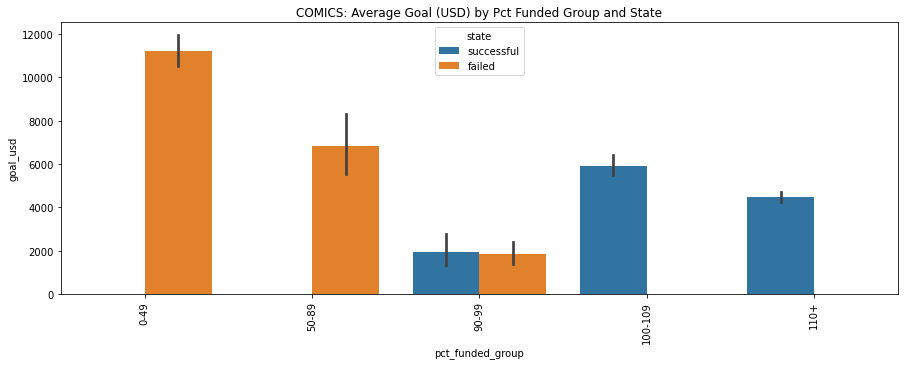

In [1121]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("COMICS: Average Goal (USD) by Pct Funded Group and State")
sns.barplot(data = df3_comics, x="pct_funded_group", y= "goal_usd", hue = "state")


<AxesSubplot:title={'center':'COMICS: Success by Sub-Category'}, xlabel='category', ylabel='count'>

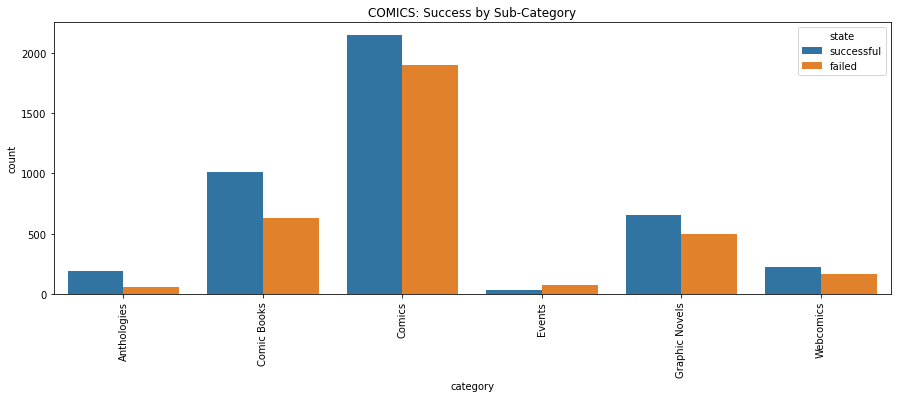

In [1122]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("COMICS: Success by Sub-Category")
sns.countplot(data = df3_comics, x="category", hue = "state")

<AxesSubplot:title={'center':'COMICS: Average Goal (USD) by Sub-Category and State'}, xlabel='category', ylabel='goal_usd'>

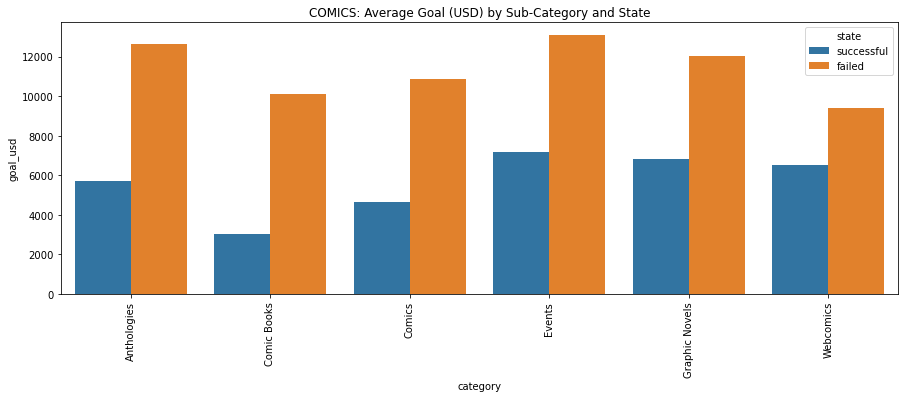

In [1123]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("COMICS: Average Goal (USD) by Sub-Category and State")
sns.barplot(data = df3_comics, x="category", y= "goal_usd", hue = "state", ci=None)


In [1124]:
df3_comics["goal_usd"].groupby(df3_comics["category"]).mean()

category
Anthologies        7344.391484
Comic Books        5752.627944
Comics             7571.433134
Events            11105.011863
Graphic Novels     9077.497269
Webcomics          7765.885955
Name: goal_usd, dtype: float64

In [1125]:
index_val = ["state", "category"]

# COMICS: mean goal by state, category 
pd.pivot_table(data= df3_comics, index=index_val, values=['goal_usd'])

goal_usd
state      category                    
failed     Anthologies     12615.629569
           Comic Books     10109.888164
           Comics          10871.023400
           Events          13077.418872
           Graphic Novels  12043.395947
           Webcomics        9385.175378
successful Anthologies      5718.158457
           Comic Books      3017.476480
           Comics           4648.894927
           Events           7160.197844
           Graphic Novels   6820.344546
           Webcomics        6542.260010

### CRAFTS 

In [ ]:
df3_crafts["goal"].loc[df3_crafts["state"]=="successful"].mean()

#mean goal for successful crafts projects = $2,947

### DANCE 

In [ ]:
df3_dance["goal"].loc[(df3_dance["state"]=="successful") & ((df3_dance["length_days_group"]=="20-29") | (df3_dance["length_days_group"]=="30-59"))].median()

#median goal for successful dance projects within 20-59 days = $3,000

In [ ]:
df3_dance["goal"].loc[(df3_dance["state"]=="successful") & ((df3_dance["length_days_group"]=="20-29") | (df3_dance["length_days_group"]=="30-59"))].mean()

#mean goal for successful dance projects within 20-59 days = $3,000

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("DANCE: Average Goal (USD) by Pct Funded Group and State")
sns.barplot(data = df3_dance, x="pct_funded_group", y= "goal_usd", hue = "state")

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("DANCE: Success by Sub-Category")
sns.countplot(data = df3_dance, x="category", hue = "state")

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("DANCE: Average Goal (USD) by Sub-Category and State")
sns.barplot(data = df3_dance, x="category", y= "goal_usd", hue = "state", ci=None)

In [ ]:
index_val = ["state", "category"]

# DANCE: mean goal by state, category 
pd.pivot_table(data= df3_dance, index=index_val, values=['goal_usd'])

### DESIGN 

In [ ]:
df3_design["goal_usd"].loc[df3_design["state"]=="successful"].mean()

#mean goal for successful design projects = $13,335

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("DANCE: Average Goal (USD) by Pct Funded Group and State")
sns.barplot(data = df3_dance, x="pct_funded_group", y= "goal_usd", hue = "state")

<AxesSubplot:title={'center':'DESIGN: Success by Sub-Category'}, xlabel='category', ylabel='count'>

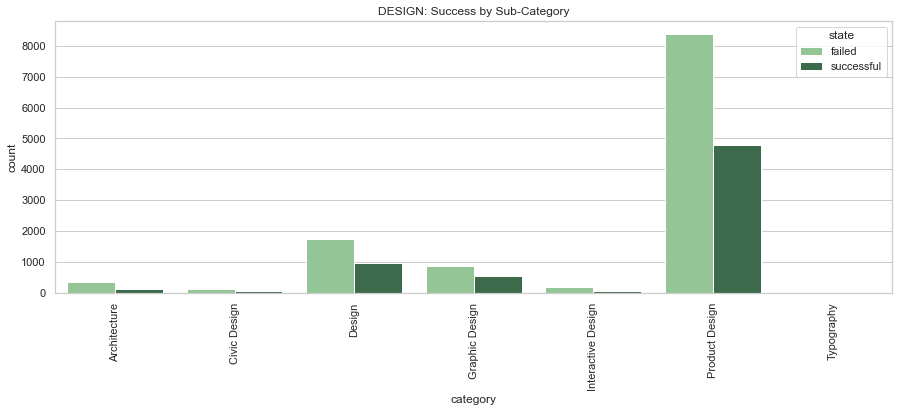

In [1222]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("DESIGN: Success by Sub-Category")
pal = sns.color_palette("Greens_d")
sns.countplot(data = df3_design, x="category", hue = "state",  palette=np.array(pal[::4]))

In [1215]:
pd.crosstab(df3_design["category"], df3_design["state"], margins = True)

state,failed,successful,All
category,,,
Architecture,340,137,477
Civic Design,129,80,209
Design,1746,970,2716
Graphic Design,873,560,1433
Interactive Design,210,62,272
Product Design,8377,4798,13175
Typography,23,46,69
All,11698,6653,18351


In [1217]:
index_val = ["state", "category"]

# DESIGN: mean goal by state, category 
pd.pivot_table(data= df3_design, index=index_val, values=['goal_usd'])

goal_usd
state      category                        
failed     Architecture        41244.079847
           Civic Design        39989.414267
           Design              23141.916590
           Graphic Design       7380.779603
           Interactive Design  26341.048245
           Product Design      29451.363853
           Typography          25164.941006
successful Architecture        10248.589316
           Civic Design        13127.030639
           Design               8350.060496
           Graphic Design       3729.437744
           Interactive Design  10130.336411
           Product Design      12719.011099
           Typography           7729.618417

In [1231]:
mod2 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_design).fit()

mod2.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.326537
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                18351
Model:                          Logit   Df Residuals:                    18348
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5014
Time:                        15:18:36   Log-Likelihood:                -5992.3
converged:                       True   LL-Null:                       -12017.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0327      0.001    -34.827      0.000      -0.035      -0.031
goal_usd       -0.0001   3.16e-06    -41.986      0.000      -0.000      -0.000
backers         0.0295      0.001     54.369      0.000       0.028       0.031
===============================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1240]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_design_odds = pd.DataFrame(np.exp(mod2.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_design_odds["pvalue"] = mod2.pvalues

## create a variable to quickly determine sig

df3_design_odds["Sig"] = np.where(df3_design_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_design_odds

,OR,pvalue,Sig
length_days,0.967804,9.594826e-266,Sig
goal_usd,0.999868,0.000000e+00,Sig
backers,1.029949,0.000000e+00,Sig


### Interpreting Logistic Regression on Design Data
For every increase of one backer, the project's chances of success increase by 3.0%

In [1251]:
# creating the 1st regression model for design
result1_design = sm.ols('usd_pledged ~ length_days + goal_usd + backers', data = df3_design).fit()

result1_design.summary()

# poor adj. R-squared (with and without intercept)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            usd_pledged   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     6317.
Date:                Tue, 26 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:49:35   Log-Likelihood:            -1.9890e+05
No. Observations:               18351   AIC:                         3.978e+05
Df Residuals:                   18347   BIC:                         3.978e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1562.8105    308.671     -5.063      0.000   -2167.834    -957.787
length_days    20.0026      8.845      2.261      0.024       2.665      37.340
goal_usd        0.0683      0.003     25.091      0.000       0.063       0.074
backers        72.9297      0.544    134.160      0.000      71.864      73.995
==============================================================================
Omnibus:                    17630.634   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1708140.104
Skew:                           4.420   Prob(JB):                         0.00
Kurtosis:                      49.431   Cond. No.                     1.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1254]:
# creating the 1st regression model for design
result2_design = sm.ols('pct_funded ~ length_days + goal_usd + backers', data = df3_design).fit()

result2_design.summary()

# good adj. R-squared

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             pct_funded   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     265.0
Date:                Tue, 26 Jul 2022   Prob (F-statistic):          2.31e-168
Time:                        15:50:17   Log-Likelihood:            -1.4494e+05
No. Observations:               18351   AIC:                         2.899e+05
Df Residuals:                   18347   BIC:                         2.899e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     138.7791     16.312      8.508      0.000     106.806     170.752
length_days    -1.8168      0.467     -3.887      0.000      -2.733      -0.901
goal_usd       -0.0015      0.000    -10.212      0.000      -0.002      -0.001
backers         0.7498      0.029     26.099      0.000       0.693       0.806
==============================================================================
Omnibus:                    55867.317   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       6870555237.830
Skew:                          45.500   Prob(JB):                         0.00
Kurtosis:                    2999.205   Cond. No.                     1.36e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### FASHION 

In [ ]:
df3_fash["goal"].loc[df3_fash["state"]=="successful"].mean()

#mean goal for successful fashion projects = $9,532

### FILM & VIDEO

In [ ]:
df3_film["goal"].loc[df3_film["state"]=="successful"].mean()

#mean goal for successful film & video projects = $9,402

### FOOD

In [ ]:
df3_food["goal"].loc[df3_food["state"]=="successful"].mean()

#mean goal for successful FOOD projects = $11,188

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("FOOD: Average Goal by Main Category and State")
sns.barplot(data = df3_food, x="category", y= "goal", hue = "state")

#How are projects successful with less than 100% funded??

### GAMES

In [ ]:
df3_games["goal"].loc[df3_games["state"]=="successful"].mean()

#mean goal for successful games projects = $8,282

<AxesSubplot:title={'center':'GAMES: Success by Sub-Category'}, xlabel='category', ylabel='count'>

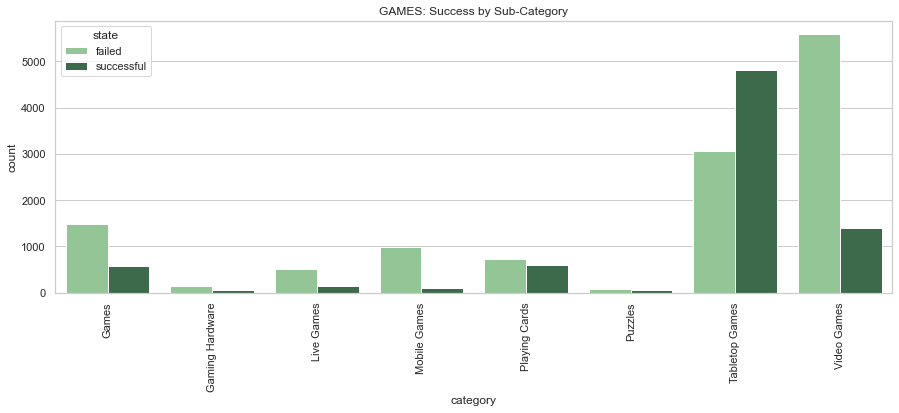

In [1218]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("GAMES: Success by Sub-Category")
pal = sns.color_palette("Greens_d")
sns.countplot(data = df3_games, x="category", hue = "state",  palette=np.array(pal[::4]))

In [1223]:
pd.crosstab(df3_games["category"], df3_games["state"], margins = True)

state,failed,successful,All
category,,,
Games,1481,572,2053
Gaming Hardware,142,49,191
Live Games,521,145,666
Mobile Games,987,107,1094
Playing Cards,735,600,1335
Puzzles,89,67,156
Tabletop Games,3064,4804,7868
Video Games,5598,1393,6991
All,12617,7737,20354


In [1221]:
index_val = ["state", "category"]

# GAMES: mean goal by state, category 
pd.pivot_table(data= df3_games, index=index_val, values=['goal_usd'])

goal_usd
state      category                     
failed     Games            24846.138768
           Gaming Hardware  27060.653426
           Live Games       33787.557332
           Mobile Games     23423.204601
           Playing Cards    12768.075057
           Puzzles          15273.336888
           Tabletop Games   17133.204361
           Video Games      29930.370455
successful Games             5551.151075
           Gaming Hardware   8312.670204
           Live Games        5066.187518
           Mobile Games      6133.471927
           Playing Cards     6821.306992
           Puzzles           4494.001955
           Tabletop Games    7329.608152
           Video Games       7981.443762

In [1241]:
mod3 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_games).fit()

mod3.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.281009
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                20354
Model:                          Logit   Df Residuals:                    20351
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5769
Time:                        15:28:46   Log-Likelihood:                -5719.7
converged:                       True   LL-Null:                       -13518.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0236      0.001    -26.683      0.000      -0.025      -0.022
goal_usd       -0.0003   5.99e-06    -47.694      0.000      -0.000      -0.000
backers         0.0295      0.001     55.968      0.000       0.028       0.031
===============================================================================

Possibly complete quasi-separation: A fraction 0.19 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1242]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_games_odds = pd.DataFrame(np.exp(mod3.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_games_odds["pvalue"] = mod3.pvalues

## create a variable to quickly determine sig

df3_games_odds["Sig"] = np.where(df3_games_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_games_odds

,OR,pvalue,Sig
length_days,0.976672,7.339360e-157,Sig
goal_usd,0.999714,0.000000e+00,Sig
backers,1.029948,0.000000e+00,Sig


### Interpreting Logistic Regression on Games Data
For every increase of one backer, the project's chances of success increase by 3.0%

### JOURNALISM

In [ ]:
df3_journ["goal"].loc[df3_journ["state"]=="successful"].mean()

#mean goal for successful journalism projects = $8,394

### MUSIC

In [ ]:
df3_music["goal"].loc[(df3_music["state"]=="successful") & ((df3_music["length_days_group"]=="20-29") | (df3_music["length_days_group"]=="30-59"))].median()

#median goal for successful music projects within 20-59 days = $3,500

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("MUSIC: Average Goal (USD) by Pct Funded Group and State")
sns.barplot(data = df3_music, x="pct_funded_group", y= "goal_usd", hue = "state")

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("MUSIC: Success by Sub-Category")
sns.countplot(data = df3_music, x="category", hue = "state")

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("MUSIC: Average Goal (USD) by Sub-Category and State")
sns.barplot(data = df3_music, x="category", y= "goal_usd", hue = "state", ci=None)

In [ ]:
index_val = ["state", "category"]

# MUSIC: mean goal by state, category 
pd.pivot_table(data= df3_music, index=index_val, values=['goal_usd'])

### PHOTOGRAPHY

In [ ]:
df3_photo["goal"].loc[df3_photo["state"]=="successful"].mean()

#mean goal for successful photography projects = $5,976

### PUBLISHING

In [ ]:
df3_pub["goal"].loc[df3_pub["state"]=="successful"].mean()

#mean goal for successful FOOD projects = $5,730

### TECHNOLOGY

In [ ]:
df3_tech["goal"].loc[df3_tech["state"]=="successful"].mean()

#mean goal for successful tech projects = $20,156

<AxesSubplot:title={'center':'TECHNOLOGY: Success by Sub-Category'}, xlabel='category', ylabel='count'>

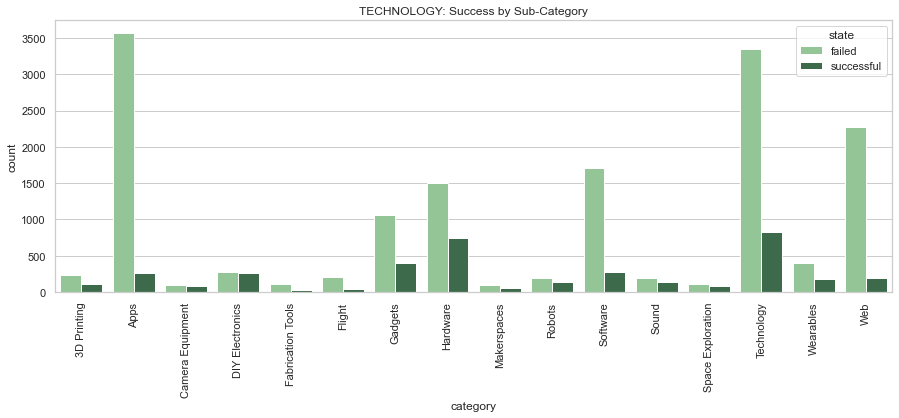

In [1209]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("TECHNOLOGY: Success by Sub-Category")
pal = sns.color_palette("Greens_d")
sns.countplot(data = df3_tech, x="category", hue = "state",  palette=np.array(pal[::4]))

#sns.barplot(data = df3, x="main_category", y= "backers", hue = "state", palette=np.array(pal[::4]), ci = None)

In [1211]:
pd.crosstab(df3_tech["category"], df3_tech["state"], margins = True)

state,failed,successful,All
category,,,
3D Printing,242,115,357
Apps,3564,258,3822
Camera Equipment,103,83,186
DIY Electronics,277,270,547
Fabrication Tools,107,34,141
Flight,214,47,261
Gadgets,1068,403,1471
Hardware,1503,749,2252
Makerspaces,92,63,155


<AxesSubplot:title={'center':'TECHNOLOGY: Goal by Sub-Category'}, xlabel='category', ylabel='goal_usd'>

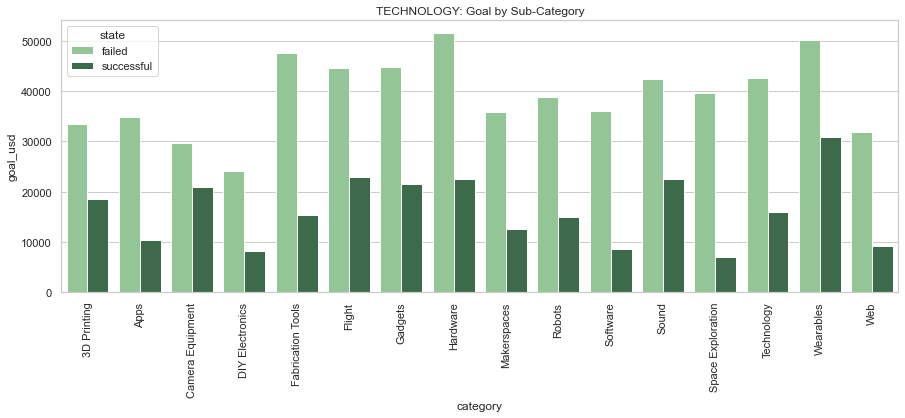

In [1212]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("TECHNOLOGY: Goal by Sub-Category")
pal = sns.color_palette("Greens_d")
sns.barplot(data = df3_tech, x="category", y = "goal_usd", hue = "state",  palette=np.array(pal[::4]), ci = None)

#sns.barplot(data = df3, x="main_category", y= "backers", hue = "state", palette=np.array(pal[::4]), ci = None)

In [1213]:
index_val = ["state", "category"]

# TECH: mean goal by state, category 
pd.pivot_table(data= df3_tech, index=index_val, values=['goal_usd'])

goal_usd
state      category                       
failed     3D Printing        33498.807557
           Apps               34923.826182
           Camera Equipment   29663.439404
           DIY Electronics    24158.367016
           Fabrication Tools  47580.575092
           Flight             44649.821008
           Gadgets            44811.832644
           Hardware           51496.636091
           Makerspaces        35831.201675
           Robots             38732.420046
           Software           36093.285694
           Sound              42399.608741
           Space Exploration  39585.809101
           Technology         42501.368027
           Wearables          50134.658246
           Web                31852.150705
successful 3D Printing        18530.199302
           Apps               10438.968532
           Camera Equipment   20968.543321
           DIY Electronics     8163.978699
           Fabrication Tools  15272.528676
           Flight             22940.107362
           Gadgets            21532.466198
           Hardware           22528.998502
           Makerspaces        12475.506905
           Robots             14859.777690
           Software            8605.613297
           Sound              22479.400992
           Space Exploration   6980.423460
           Technology         15983.114118
           Wearables          30860.707538
           Web                 9083.323349

In [ ]:
pd.crosstab(df3_tech["category"], df3_tech["state"], margins = True)

In [1224]:
df3_tech["backers"].groupby(df3_tech["state"]).mean()

state
failed         19.914930
successful    227.883475
Name: backers, dtype: float64

In [1228]:
mod1 = sm.logit('state_binary ~ length_days + goal_usd + backers -1', data=df3_tech).fit()

mod1.summary()

# excellent p-value: the model fits the data well

Optimization terminated successfully.
         Current function value: 0.228271
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           state_binary   No. Observations:                19278
Model:                          Logit   Df Residuals:                    19275
Method:                           MLE   Df Model:                            2
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                  0.5454
Time:                        15:11:37   Log-Likelihood:                -4400.6
converged:                       True   LL-Null:                       -9679.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
length_days    -0.0443      0.001    -43.763      0.000      -0.046      -0.042
goal_usd       -0.0001   3.19e-06    -39.144      0.000      -0.000      -0.000
backers         0.0344      0.001     48.749      0.000       0.033       0.036
===============================================================================

Possibly complete quasi-separation: A fraction 0.18 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [1229]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_tech_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_tech_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df3_tech_odds["Sig"] = np.where(df3_tech_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_tech_odds

,OR,pvalue,Sig
length_days,0.956632,0.0,Sig
goal_usd,0.999875,0.0,Sig
backers,1.035013,0.0,Sig


### Interpreting Logistic Regression on Technology Data
- For everyone one day increase in length of the campaign, the probability of the project  being successful decreases by 0.04%.
- For every one USD increase in the goal, the probability of the project being successful decreases by .01%.
- For every increase of one backer, the project's chances of success increase by 3.5%.

### THEATER

In [ ]:
df3_thea["goal"].loc[(df3_thea["state"]=="successful") & ((df3_thea["length_days_group"]=="20-29") | (df3_thea["length_days_group"]=="30-59"))].median()

#median goal for successful theater projects within 20-59 days = $2,800

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("THEATER: Average Goal (USD) by Pct Funded Group and State")
sns.barplot(data = df3_thea, x="pct_funded_group", y= "goal_usd", hue = "state")

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("THEATER: Success by Sub-Category")
sns.countplot(data = df3_thea, x="category", hue = "state")

In [ ]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("THEATER: Average Goal (USD) by Sub-Category and State")
sns.barplot(data = df3_thea, x="category", y= "goal_usd", hue = "state", ci=None)

In [ ]:
index_val = ["state", "category"]

# THEATER: mean goal by state, category 
pd.pivot_table(data= df3_thea, index=index_val, values=['goal_usd'])

In [ ]:
df3.to_excel("Kickstarter_df3.xlsx")

In [ ]:
df4 = df3.copy()

In [ ]:
df4.columns

# A Deeper Look at Aggregate Data

In [ ]:
index_val = ["state", "backers_group", "length_days_group"]

# mean average goal by state, backers_group, length_days_group 
pd.pivot_table(data= df3, index=index_val, values=['goal_usd'])

#once again, we see that a lower goal is important for success

## Regression on Aggregate Data

In [ ]:
sns.countplot(data=df3, x="state_binary")

In [ ]:
mod1 = sm.logit('state_binary ~ length_days + goal_usd + backers + usd_pledged', data=df3).fit()

mod1.summary()

# excellent p-value: the model fits the data well

In [ ]:
## create a dataframe with the variable names, OR's and p-values
# np.exp >> calculate the exponential of a given value

df3_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

df3_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

df3_odds["Sig"] = np.where(df3_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

df3_odds

### Interpreting Logistic Regression on Aggregate Data
- For everyone one day increase in length of the campaign, the probability of the project  being successful decreases by 1.35%.
- For every one USD increase in the goal, the probability of the project being successful decreases by .05%.
- For every increase of one backer, the project's chances of success increase by 4%.

In [ ]:
# Naive Bayes Gaussian Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df3.count()

In [ ]:
gaussian_modeldf = df3[['length_days', 'goal_usd', 'backers', 'state_binary']]
gaussian_modeldf.head()

In [ ]:
#dataframe with predicting features
X = gaussian_modeldf.drop('state_binary', axis=1)

#column of predictive target values
y = gaussian_modeldf['state_binary']

In [ ]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=592)

##random state: change this number a few times to see if you get similar results (computer doesn't always choose data randomly,

In [ ]:
#initialize Gaussian Bayes classifier
gnb = GaussianNB()

In [ ]:
#train the model to learn trends
gnb.fit(X_train, y_train)

In [ ]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

In [ ]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [ ]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Unsuccessful', 'Predicted Successful'],
    index=['True Unsuccessful', 'True Successful']
)

cm

In [ ]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

In [ ]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

In [ ]:
# Naive Bayes Bernoulli Classifier

In [ ]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [ ]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [ ]:
#build the model with training data
bnb.fit(X_train, y_train)

In [ ]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

In [ ]:
#test the model on unseen data
#score predictive values in variable
y_pred = bnb.predict(X_test)

In [ ]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Unsuccessful', 'Predicted Successful'],
    index=['True Unsuccessful', 'True Successful']
)

cm

In [ ]:
#predictive score of the model on the test data
bnb.score(X_test, y_test)

In [ ]:
sns.lmplot(data = df3, x = 'goal_usd', y = 'length_days', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal (USD) vs. Length_Days per State")

#looks like length doesn't matter as much as goal

In [ ]:
sns.lmplot(data = df3, x = 'goal_usd', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Goal (USD) vs. Avg Pledge per Backer")

# reaffirms that lower goal is more successful, directly correlates with average pledge per backer

In [ ]:
sns.lmplot(data = df3, x = 'length_days', y = 'avg_pledge_per_backer', fit_reg = False, hue = "state", height = 8, aspect = 1.5)
plt.title("Length vs. Avg Pledge per Backer")

#interesting!  no apparent correlation between the two variables.  successful projects have lower goals

In [ ]:
# average number of backers and pledges by main category and subcategory 


In [ ]:
## state by campaign main category (crosstab)

pd.crosstab(df3["main_category"], df3["state"])

#success rates PER MAIN CATEGORY:
#art: 44%
#comics: 57% 
#crafts: 26%
#dance: 66%
#design: 39%
#fashion: 27%
#film&video: 42%
#food: 28%
#games: 41%
#journalism: 25%
#music: 53%
#photography: 34%
#publishing: 34%
#technology: 22%
#theater: 64%

# Film & Video, Music compose greatest % of overall success (across all main categories) on Kickstarter, as a result of having the most projects
# Dance, Theater, Comics most successful within their own category

In [ ]:
for col in df3_art:
    print(df3_art[col].unique())

In [ ]:
#arts = {"Sub-Category":['Art', 'Ceramics', 'Conceptual Art', 'Digital Art', 'Illustration',
 #'Installations', 'Mixed Media', 'Painting', 'Performance Art', 'Public Art',
 #'Sculpture', 'Textiles', 'Video Art'], 
            # "Success":[
(df.loc[df3_art["category"]=="Art" and df3_art["state"]=='successful'].index).sum()
             #"Fail":["Columbia", "Scotland", "USA", "Canada", "South Africa"], 


#df = pd.DataFrame(passenger)

#df

## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 